## Household Survey Kenya 

This dataset was provided by a lecturer in a statistics class. She presented it as a 'dirty' dataset that needed thorough cleaning. The dataset itself "hortilinea.csv" is a questionnaire about what type of produce their (small) farms generated, the produced quantity, it uses local measurement units (i.e. gorogoro, debe, gorogoro,pakaacha, handful, heap) whose equivalency with international measurements are not easily and unequivocally traceable.Where I found reliable information in the Internet, I used it. Otherwise, I had to do without the missing values. 
As such, the most important takeaway from this dataset is the cleaning, handling missing values, finding interesting questions that the avalaible dataset can answer. 


#### Objectives 

The first objective in dealing with this dataset is to perform some data cleaning, engineeer some features (i.e an imputed column on the total yield  in quantity), analyse and visualize the data. To this end, I renamed the original columns, dropped irrelevant ones, generated nullity matrix, computed the percentage of missing values, wrote functions to convert Kenyan Shilling to Euro or acres to hectars, functions to generate plots or machine learning models, or to filter data, remove or fill incorrect and missing values.

In addition to that, summary statistics such correlation matrix, plots on data distribution were generated when needed. I made use of the seaborn library for violin plots or regression plots, and tried my hand at altair for interactive visualization, a treemap in Python with sqarify, .  

The last important objective was to apply regression (linear and logistic), and clustering to the cleaned data. For the logistic regression and classification tasks, I used metrics such as accuracy,  confusion matrix, classification report to assess the performance of the models. When models relied on the null accuracy, I made use of an oversampling techniques to improve the accuracy.  


## Importing the necessary dependencies 

In [253]:
import missingno as msno

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib as mpl 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf 
import statsmodels.graphics.api as smg 
import patsy 
from statsmodels.graphics.correlation import plot_corr 
from sklearn.model_selection import train_test_split 
plt.style.use('seaborn') 
np.set_printoptions(suppress=True)
#pd.set_option('display.max_columns', 50)
#pd.set_option('display.max_rows', 5000)



In [3]:
import missingno

#### Loading the Data 

In [4]:
raw_df= pd.read_csv('Desktop/hortilinea_a.csv', sep= ';', index_col= 0)
raw_df.head(n=2)

hhno  q11.1 q11.1a  VAR00001 Othercrop  q11.2 q11.3 q11.4   q11.5  \
0   1.0  Maize  Crops       NaN       NaN    1.0  0.25  Head  2008.0   
1   1.0  Pears  Crops       NaN       NaN    2.0   1.0  Head  2008.0   

             q11.6  ... q11.43c3  q11.44a q11.44b q11.44c1 q11.44c2  q11.44c3  \
0  Stayed the same  ...      NaN      0.0   300.0      2.0      6.0      Head   
1  Stayed the same  ...      NaN      0.0  2300.0      4.0      6.0      Head   

  q11.45 entrynum  dup  pesticide  
0    0.0      2.0  0.0         no  
1    0.0      1.0  0.0         no  

[2 rows x 94 columns]

### Dropping Columns

Dropping the columns that are straighforward irrelevant to this project.

In [5]:
df= raw_df.drop(columns= ['VAR00001', 'Othercrop', 
                         'q11.2', 'q11.15','q11.16',
                         'q11.17',
                         'q11.18.qty',
                         'q11.18.units', 'q11.19', 
                         'q11.41', 'q11.42',
                         'q11.43a', 'q11.43b', 'q11.43c1',
                         'q11.43c2','q11.43c3', 'dup', 'q11.44a', 'entrynum',
                         'q11.38c2', 'q11.38c3', 'q11.38b', 
                         'q11.38c1'])


#### A Tabular Overview of some of the columns

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">hhno</th>
    <th class="tg-0pky">QuestNum</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">q11.1</td>
    <td class="tg-0pky">ProductDesignation</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.1a</td>
    <td class="tg-0pky">ProductName</td>
  </tr>
  <tr>
    <td class="tg-0pky">VAR00001</td>
    <td class="tg-0pky">name of the product grown -no values</td>
  </tr>
  <tr>
    <td class="tg-0pky">Othercrop Othercrop </td>
    <td class="tg-0pky">sporadic values. to be dropped</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.2 </td>
    <td class="tg-0pky"> Name of product grown. Makes no sense</td>
  </tr>
  <tr>
    <td class="tg-0pky">Q11.3</td>
    <td class="tg-0pky">TotalCropArea</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.4 </td>
    <td class="tg-0pky">Responsible for Production -Lead Producer</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.5 </td>
    <td class="tg-0pky">ProductCultivationStart</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.6 </td>
    <td class="tg-0pky">FiveYearTrend</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.7 </td>
    <td class="tg-0pky">CropConversionCause</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.8.qty </td>
    <td class="tg-0pky">YieldInAllSeasons</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.8.units</td>
    <td class="tg-0pky">UnitsofYield</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.9 </td>
    <td class="tg-0pky">AverageYieldTrend</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.10 </td>
    <td class="tg-0pky">TrendChangeReasons</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.11 qty </td>
    <td class="tg-0pky">HarvestSold</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.11.units </td>
    <td class="tg-0pky">HarvestSoldUnits</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.12 </td>
    <td class="tg-0pky">PostHarvestPrice</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.13 </td>
    <td class="tg-0pky">Salesperson in Household</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.14.qty </td>
    <td class="tg-0pky">StoredHarvestQty</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.14.units </td>
    <td class="tg-0pky">StoredHarvestUnits</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.15 </td>
    <td class="tg-0pky">MonthSold</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.16</td>
    <td class="tg-0pky">PriceperUnitSold (in Kenian Shilling)</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.17 </td>
    <td class="tg-0pky">StorageLossFaced</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.18.qty </td>
    <td class="tg-0pky">StoredHarvestLost</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.18.units</td>
    <td class="tg-0pky">StoredHarvestLostInUnits</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.19 </td>
    <td class="tg-0pky">LossCause</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.20.qty </td>
    <td class="tg-0pky">OwnHarvestConsumption</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.20.units </td>
    <td class="tg-0pky">UnitsHarvestConsumption</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.21.i, q11.21.ii, q11.21.iii</td>
    <td class="tg-0pky">Month where the own produce was consumed</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.22.qty <br></td>
    <td class="tg-0pky">HarvestGifted</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.22.units <br></td>
    <td class="tg-0pky">UnitsGifted</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.23.qty <br></td>
    <td class="tg-0pky">HarvestasFoodforAnimals</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.23.units <br></td>
    <td class="tg-0pky">FoodforAnimalsUnits</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.24.qty <br></td>
    <td class="tg-0pky">HarvestStoredasSeed</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.24.units <br></td>
    <td class="tg-0pky">HarvestStoredasSeed</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.25.qty  <br></td>
    <td class="tg-0pky">HarvestasBarter</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.25.units <br></td>
    <td class="tg-0pky">HarvestasBarterUnits</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.26a <br></td>
    <td class="tg-0pky">ProductExpenses (LandPreparation)</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.26b <br></td>
    <td class="tg-0pky">Hired Labor Expenses</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.26c1 <br></td>
    <td class="tg-0pky">FamilyLaborExpendituresD (days)</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.26c2 <br></td>
    <td class="tg-0pky">FamilyLaborExpendituresH (Average Hour perday)</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.26c3 <br></td>
    <td class="tg-0pky">HouseholdParticipants</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.27 <br></td>
    <td class="tg-0pky">SeedsBought (for the product)</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.28a <br></td>
    <td class="tg-0pky">SeedlingMachExp</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.28b <br></td>
    <td class="tg-0pky">HiredLaborExp</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.28c1 <br></td>
    <td class="tg-0pky">DailyFamExp</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.28c2 <br></td>
    <td class="tg-0pky">DailySeedlingexp</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.28c3 <br></td>
    <td class="tg-0pky">HousMembParticipation</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.28d1 <br></td>
    <td class="tg-0pky">SeedQuantPlanted</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.28d2 <br></td>
    <td class="tg-0pky">SeedPlantedUnits</td>
  </tr>
  <tr>
    <td class="tg-0pky">q11.28d3 <br></td>
    <td class="tg-0pky">SeedPlantedPrice</td>
  </tr>
</tbody>
</table>

#### An Overview of the Data

In [6]:
df.head(4)

hhno                                          q11.1                 q11.1a  \
0   1.0                                          Maize                  Crops   
1   1.0                                          Pears                  Crops   
2   1.0                       Cowpeas (Likhubi, Kunde)  Indigenous vegetables   
3   1.0  African night shade (lisutsa, managu, sochot)  Indigenous vegetables   

  q11.3 q11.4   q11.5            q11.6           q11.7  q11.8.qty  \
0  0.25  Head  2008.0  Stayed the same  Not applicable       30.0   
1   1.0  Head  2008.0  Stayed the same  Not applicable       80.0   
2  0.12  Head  2008.0  Stayed the same  Not applicable        1.0   
3  0.12  Head  2008.0  Stayed the same  Not applicable        1.0   

      q11.8.units  ... q11.37c3 q11.38a  q11.39   q11.40 q11.44b q11.44c1  \
0         handful  ...     Head     0.0      No  No need   300.0      2.0   
1        Gorogoro  ...     Head     0.0      No  No need  2300.0      4.0   
2  Other, specify  ...     Head   500.0      No  No need     0.0      1.0   
3  Other, specify  ...     Head   500.0      No  No need     0.0      1.0   

   q11.44c2 q11.44c3  q11.45 pesticide  
0       6.0     Head     0.0        no  
1       6.0     Head     0.0        no  
2       3.0   Spouse     0.0       yes  
3       3.0   Spouse     0.0       yes  

[4 rows x 71 columns]

#### Renaming The Original Columns for Easy Access and Referencing 

In [7]:
renamed_df = df.rename(columns={'hhno':'QuestNumber',
 'q11.1': 'ProductDesignation',
 'q11.1a':'ProductClass',
 'q11.3': 'TotalCropArea',
 'q11.4': 'LeadProducer',
 'q11.5': 'ProductCultivationStart',
 'q11.6': 'FiveYearTrend',
 'q11.7': 'CropConversionCause',
 'q11.8.qty' :'YieldInAllSeasons',
 'q11.8.units': 'YieldinUnits',
 'q11.9': 'AverageYieldTrend',
 'q11.10': 'TrendChangeReasons',
 'q11.11.qty' : 'HarvestSoldQty',
 'q11.11.units' : 'HarvestSoldUnits',
 'q11.12': 'PostHarvestPrice',
 'q11.13': 'SalespersoninHouse',
 'q11.14.qty': 'StoredHarvestQty',
 'q11.14.units': 'StoredHarvestUnits',
 'q11.20.qty': 'OwnHarvestConsumption ',
 'q11.20.units' : 'UnitsHarvestConsumption',
 'q11.21.i': 'MonthConsumpi',
 'q11.21.ii' : 'MonthConsumpii',
 'q11.21.iii': 'MonthConsumpiii',
 'q11.22.qty' : 'HarvestGifted',
 'q11.22.units': 'UnitsGifted',
 'q11.23.qty': 'HarvestasFoodforAnimals',
 'q11.23.units' : 'FoodforAnimalsUnits',
 'q11.24.qty': 'HarvestStoredasSeedQty',
 'q11.24.units' : 'HarvestStoredasSeedUnits',
 'q11.25.qty': 'HarvestasBarterQty',
 'q11.25.units' : 'HarvestasBarterUnits',
 'q11.26a' : 'ProductExpenses',
 'q11.26b' : 'HiredLaborExpenses',
 'q11.26c1': 'DailyFamExp',
 'q11.26c2': 'DailySeedlingexp',
 'q11.26c3': 'HousMembParticipation',
 'q11.27': 'SeedsBought',
 'q11.28a' : 'SeedlingMachExp',
 'q11.28b': 'HiredLaborExp',
 'q11.28c1': 'DailyFamExp',
 'q11.28c2' :'DailySeedlingexp',
 'q11.28c3': 'HousMembParticipation',
 'q11.28d1' :'SeedQuantPlanted',
 'q11.28d2': 'SeedPlantedUnits',
 'q11.28d3': 'SeedPlantedPrice',
 'q11.29': 'SeedType',
 'q11.30' : 'SeedSource',
 'q11.31a': 'MachineryWeedingExp',
 'q11.31b': 'HiredLaborWeedExp ',
 'q11.31c1': 'FamWeedLabExpPersDay',
 'q11.31c2': 'FamWeedLabExp',
 'q11.31c3': 'HousMembPart',
 'q11.32': 'FertUsage',
 'q11.33':'FertUsFreq ',
 'q11.34': 'FertKindUsed',
 'q11.35': 'FertOrigin',
 'q11.36': 'FertUsQuant',
 'q11.37a' : 'FertExpend',
 'q11.37b':'HiredLabFertAppl',
 'q11.37c1' :'ExpFamLabourFertPersDay',
 'q11.37c2' :'ExpFamLabourFertAvgh',
 'q11.37c3' :'HousMemPartFert',
 'q11.38a' :'ExpPestAppl',
 'q11.39' :'IrrigationUse',
 'q11.40':'WhyNoIrrig',
 'q11.44b' : 'IrrigTypUsed',
 'q11.44c1' :'ExpFamLabHarvesting',
 'q11.44c2': 'ExpenditureFamLabourProduct',
 'q11.44c3' : 'FamMembPartHarv',
 'q11.45' :'OtherCosts',
 'pesticide':'PestUse'})

### Checking for Missing Values, Data Type

#### An Overview of the count of missing values and their percentage

It is generally advised to drop columns that have 80% or more data missing. Notheless, I will keep them as of now and try to explore the problem further. Moreover, it should not be forgotten that a column having non-missing values might have incorrect values. 

In [8]:
mask = renamed_df.isnull()
total= mask.sum()
percent = 100*mask.mean()
missing_data = pd.concat([total, percent], axis= 1, join = 'outer', keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by= 'perc_missing', ascending= False, inplace = True)
missing_data.head(6)

count_missing  perc_missing
FoodforAnimalsUnits                6207     89.813341
HarvestasBarterUnits               6181     89.437129
HarvestStoredasSeedUnits           5802     83.953118
UnitsGifted                        5461     79.018955
StoredHarvestUnits                 4404     63.724497
MonthConsumpiii                    3899     56.417306

#### Plotting the Nullity Matrix

In [9]:
import missingno as msno

In [10]:
nullable_columns = renamed_df.columns[mask.any()].tolist()

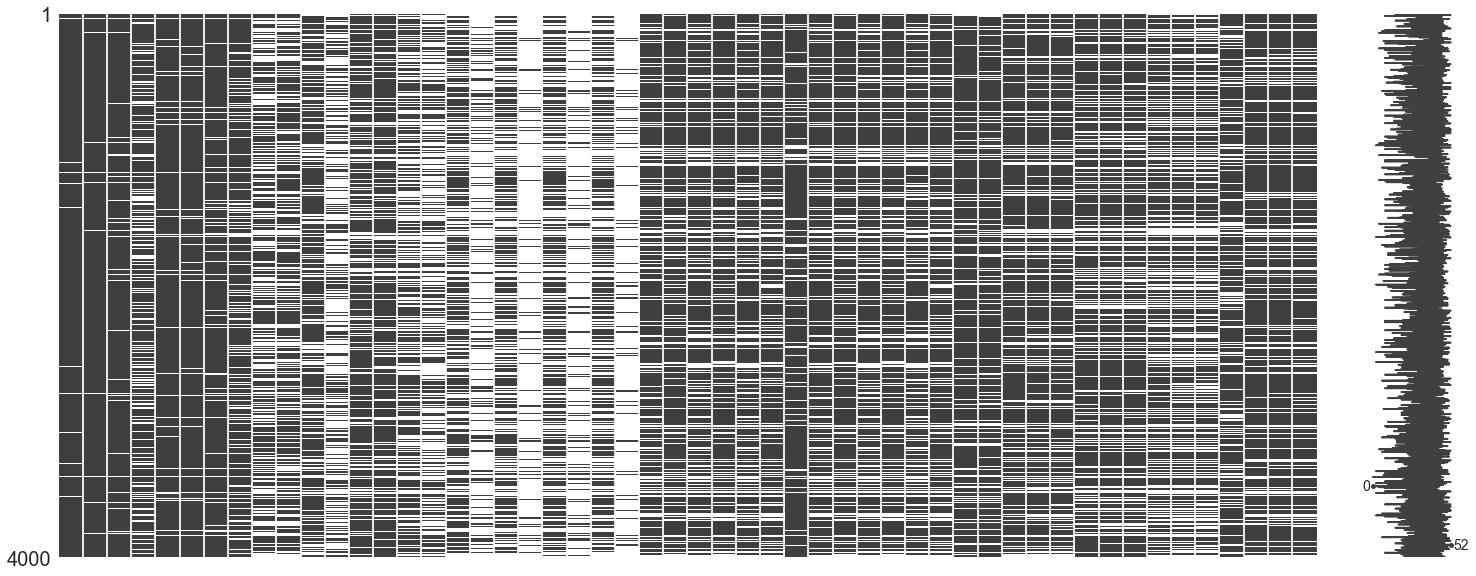

In [11]:
fig=msno.matrix(renamed_df[nullable_columns].sample(4000))

In [12]:
plt.show()

In [13]:
fig_copy = fig.get_figure() 

fig_copy.savefig('nullity.png')

A nullity matrix, as its documentation suggests, is a data-dense display which lets you quickly visually pick out patterns in data completion.

#### Nullity Heatmap

The nullity correlation tells, according to its documentation, how strongly the presence or absence of one variable affects the presence of another.

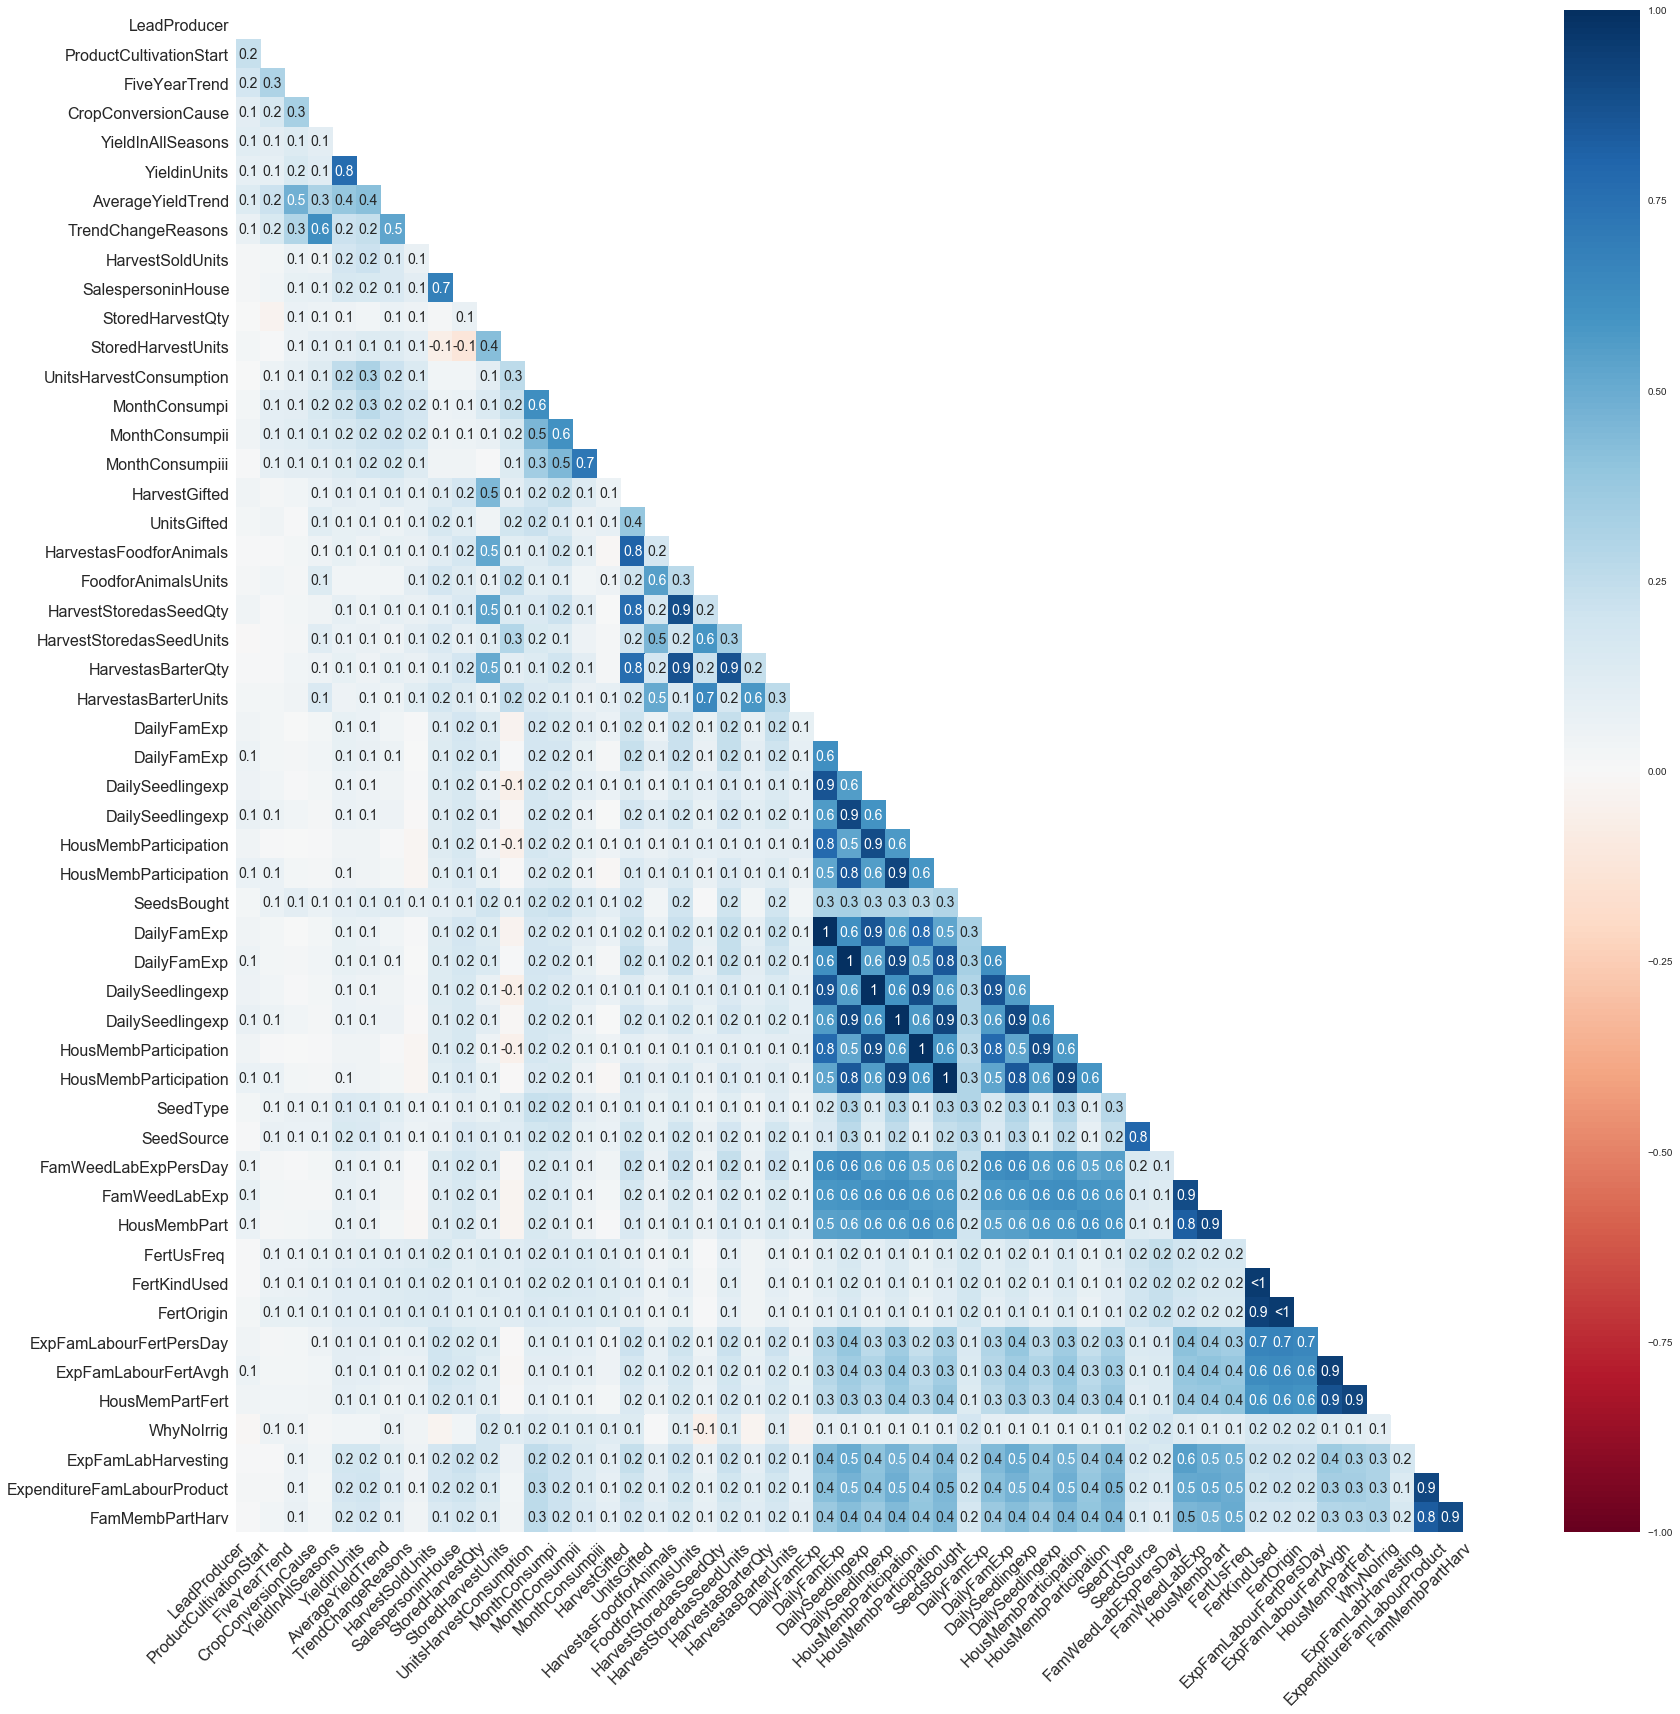

In [14]:
fig= msno.heatmap(renamed_df[nullable_columns], figsize = (28,28))
fig_copy = fig.get_figure() 

fig_copy.savefig('Desktop/Figures_hortilinea/nullitymatrix.png')

In [15]:
plt.show()

### Cleaning the  Year Column 

In [16]:
renamed_df['ProductCultivationStart'].unique()

array([    2008.,     1988.,     1990.,     1994.,     2012.,     2004.,
           1970.,     2000.,     1999.,     1985.,     1984.,     2010.,
           2014.,       nan,     2011.,     1986.,     1992.,     1993.,
           1996.,     1998.,     2013.,     1989.,     1981.,     2009.,
           2006.,     2005.,     2002.,     1964.,     1980.,     1991.,
           1997.,     1995.,     1968.,     1982.,     2007.,     1987.,
           1978.,     1974.,     2003.,     1979.,     1972.,     1973.,
           1975.,      200.,     1966.,     1960.,       20.,     2001.,
           1971.,     1963.,      190.,     1983.,        1.,        7.,
             10.,       12.,       13.,       15.,        6.,     1953.,
              3.,     1969.,        2.,     1965.,        5.,       25.,
           1977.,     1956.,      194.,     1955.,     1976.,     1920.,
           1887.,     1944., 20012001.,    19955.,        4.,      205.,
           1967.,       23.,     1950.,     1009., 

In [17]:
renamed_df =renamed_df[renamed_df['ProductCultivationStart'] > 1965] 

In [18]:
renamed_df.head(4)

QuestNumber                             ProductDesignation  \
0          1.0                                          Maize   
1          1.0                                          Pears   
2          1.0                       Cowpeas (Likhubi, Kunde)   
3          1.0  African night shade (lisutsa, managu, sochot)   

            ProductClass TotalCropArea LeadProducer  ProductCultivationStart  \
0                  Crops          0.25         Head                   2008.0   
1                  Crops           1.0         Head                   2008.0   
2  Indigenous vegetables          0.12         Head                   2008.0   
3  Indigenous vegetables          0.12         Head                   2008.0   

     FiveYearTrend CropConversionCause  YieldInAllSeasons    YieldinUnits  \
0  Stayed the same      Not applicable               30.0         handful   
1  Stayed the same      Not applicable               80.0        Gorogoro   
2  Stayed the same      Not applicable                1.0  Other, specify   
3  Stayed the same      Not applicable                1.0  Other, specify   

   ... HousMemPartFert ExpPestAppl  IrrigationUse WhyNoIrrig IrrigTypUsed  \
0  ...            Head         0.0             No    No need        300.0   
1  ...            Head         0.0             No    No need       2300.0   
2  ...            Head       500.0             No    No need          0.0   
3  ...            Head       500.0             No    No need          0.0   

  ExpFamLabHarvesting  ExpenditureFamLabourProduct FamMembPartHarv  \
0                 2.0                          6.0            Head   
1                 4.0                          6.0            Head   
2                 1.0                          3.0          Spouse   
3                 1.0                          3.0          Spouse   

   OtherCosts PestUse  
0         0.0      no  
1         0.0      no  
2         0.0     yes  
3         0.0     yes  

[4 rows x 71 columns]

In [19]:
renamed_df =renamed_df[renamed_df['ProductCultivationStart'] < 2015] 

In [20]:
renamed_df['ProductCultivationStart'].unique()

array([2008., 1988., 1990., 1994., 2012., 2004., 1970., 2000., 1999.,
       1985., 1984., 2010., 2014., 2011., 1986., 1992., 1993., 1996.,
       1998., 2013., 1989., 1981., 2009., 2006., 2005., 2002., 1980.,
       1991., 1997., 1995., 1968., 1982., 2007., 1987., 1978., 1974.,
       2003., 1979., 1972., 1973., 1975., 1966., 2001., 1971., 1983.,
       1969., 1977., 1976., 1967.])

In [21]:
renamed_df['ProductCultivationStart']= renamed_df['ProductCultivationStart'].astype('int32')

In [22]:
renamed_df['ProductCultivationStart'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: ProductCultivationStart, dtype: int32

#### Checking the Column 'Yields in Units'

In [23]:
##Turning all values to Kg

In [24]:
renamed_df.YieldinUnits.unique()


array(['handful', 'Gorogoro', 'Other, specify', nan, 'Bunch',
       'Piece/numbers', 'Kilograms', '90 kg bag', '25 kg bag',
       '100 kg bag', 'Pakaacha', 'Debe', '50 kg bag', 'Ton', 'Heap',
       'Litres', 'Bowl', 'Table spoon', 'Grams', '70.0', '60.0', '0.0',
       '25.0', 'Tin', '360.0', '170.0', '100.0', '250.0', '99.0', '50.0',
       '200.0', '300.0', '30.0', '90.1', '1.5'], dtype=object)

In [25]:
renamed_df.YieldinUnits = renamed_df.YieldinUnits.replace({
    '50 kg bag' : 50, 
    '25 kg bag':25, 
    '90 kg bag' :90, 
    'handful': 0.2, 
    '99.0': 0,
    '100 kg bag':100, 
    'Bunch': 0.34, 
    'Kilograms': 1,
    'Piece/numbers':0,
    'Other, specify': 0, 
    'Debe': 20,
    'Gorogoro':2.5,
    'Pakaacha':30,
    'Ton':1000,
    'Heap': 0,
    'Bowl':0.5,
    'Table spoon':0,
    'Grams':0.001,
    'Tin':0,
    'Litres':1, 
    'nan': 0
    })


In [26]:
renamed_df.YieldinUnits = renamed_df.YieldinUnits.fillna(0)

In [27]:
renamed_df.YieldinUnits = renamed_df.YieldinUnits.astype('float32')

In [28]:
renamed_df.YieldinUnits = renamed_df.YieldinUnits.dropna()

In [29]:
renamed_df.YieldinUnits.head()

0    0.2
1    2.5
2    0.0
3    0.0
4    0.0
Name: YieldinUnits, dtype: float32

In [30]:
renamed_df['YieldinUnits']= renamed_df['YieldinUnits'].dropna(how='any')

In [31]:
renamed_df.head(5)

QuestNumber                             ProductDesignation  \
0          1.0                                          Maize   
1          1.0                                          Pears   
2          1.0                       Cowpeas (Likhubi, Kunde)   
3          1.0  African night shade (lisutsa, managu, sochot)   
4          1.0               Spiderplant (Tsisaka,saget,saga)   

            ProductClass TotalCropArea LeadProducer  ProductCultivationStart  \
0                  Crops          0.25         Head                     2008   
1                  Crops           1.0         Head                     2008   
2  Indigenous vegetables          0.12         Head                     2008   
3  Indigenous vegetables          0.12         Head                     2008   
4  Indigenous vegetables          0.12         Head                     2008   

     FiveYearTrend CropConversionCause  YieldInAllSeasons  YieldinUnits  ...  \
0  Stayed the same      Not applicable               30.0           0.2  ...   
1  Stayed the same      Not applicable               80.0           2.5  ...   
2  Stayed the same      Not applicable                1.0           0.0  ...   
3  Stayed the same      Not applicable                1.0           0.0  ...   
4  Stayed the same      Not applicable                1.0           0.0  ...   

  HousMemPartFert ExpPestAppl  IrrigationUse WhyNoIrrig IrrigTypUsed  \
0            Head         0.0             No    No need        300.0   
1            Head         0.0             No    No need       2300.0   
2            Head       500.0             No    No need          0.0   
3            Head       500.0             No    No need          0.0   
4            Head       500.0             No    No need          0.0   

  ExpFamLabHarvesting  ExpenditureFamLabourProduct FamMembPartHarv  \
0                 2.0                          6.0            Head   
1                 4.0                          6.0            Head   
2                 1.0                          3.0          Spouse   
3                 1.0                          3.0          Spouse   
4                 1.0                          3.0          Spouse   

   OtherCosts PestUse  
0         0.0      no  
1         0.0      no  
2         0.0     yes  
3         0.0     yes  
4         0.0     yes  

[5 rows x 71 columns]

#### Checking Yield in All Seasons 

In [32]:
renamed_df.YieldInAllSeasons.head()


0    30.0
1    80.0
2     1.0
3     1.0
4     1.0
Name: YieldInAllSeasons, dtype: float64

In [33]:
renamed_df.YieldInAllSeasons= renamed_df.YieldInAllSeasons.fillna(0).astype('float32')

In [34]:
renamed_df.YieldInAllSeasons=renamed_df[renamed_df.YieldInAllSeasons >0]

In [35]:
renamed_df.YieldInAllSeasons.dropna(how = 'any').head()

0    1
1    1
2    1
3    1
4    1
Name: YieldInAllSeasons, dtype: object

#### Engineering a New Columns 'YieldedQtyinKg'

In [36]:
renamed_df['YieldedQtyinKg'] = renamed_df['YieldInAllSeasons']*renamed_df['YieldinUnits']
renamed_df.YieldedQtyinKg.astype('float32').head(7)

0    0.20
1    2.50
2    0.00
3    0.00
4    0.00
5    0.00
6    0.34
Name: YieldedQtyinKg, dtype: float32

In [37]:
renamed_df.head(2)

QuestNumber ProductDesignation ProductClass TotalCropArea LeadProducer  \
0          1.0              Maize        Crops          0.25         Head   
1          1.0              Pears        Crops           1.0         Head   

   ProductCultivationStart    FiveYearTrend CropConversionCause  \
0                     2008  Stayed the same      Not applicable   
1                     2008  Stayed the same      Not applicable   

  YieldInAllSeasons  YieldinUnits  ... ExpPestAppl IrrigationUse  WhyNoIrrig  \
0                 1           0.2  ...         0.0            No     No need   
1                 1           2.5  ...         0.0            No     No need   

  IrrigTypUsed ExpFamLabHarvesting ExpenditureFamLabourProduct  \
0        300.0                 2.0                         6.0   
1       2300.0                 4.0                         6.0   

   FamMembPartHarv OtherCosts  PestUse YieldedQtyinKg  
0             Head        0.0       no            0.2  
1             Head        0.0       no            2.5  

[2 rows x 72 columns]

#### Checking  the levels of the Columns 'HarvestSoldQty'

In [38]:
renamed_df.HarvestSoldQty.unique()

array([    0.   ,    60.   ,     1.   ,     5.   ,   400.   ,     6.   ,
         900.   ,    10.   ,    40.   ,  2000.   ,     7.   ,     9.   ,
           8.   ,    25.   ,     1.5  ,    20.   ,     0.5  ,   600.   ,
           4.8  ,    24.   ,     2.   ,   160.   ,    50.   ,    36.   ,
         180.   ,    18.   ,  4000.   ,     3.   ,    30.   ,   195.   ,
        3600.   ,     4.   ,  1400.   ,    23.   ,    15.   ,     0.4  ,
         350.   ,   104.   ,    35.   ,    26.   ,  1200.   ,  2500.   ,
         500.   ,    48.   ,  9000.   ,    75.   ,   300.   ,    27.   ,
          46.   ,    12.   ,    90.   ,     0.25 ,   100.   ,   120.   ,
          52.   ,  2400.   ,    14.   ,   200.   ,    80.   ,    16.   ,
           2.5  ,     0.2  ,     4.5  ,     0.3  ,     0.75 ,    17.   ,
        4500.   ,    21.   ,   105.   ,   108.   ,  1800.   ,  3000.   ,
         150.   ,    45.   ,     1.75 ,     1.8  ,     1.9  ,     0.9  ,
         450.   ,   270.   ,   700.   ,    42.   , 

#### Checking Column Harvest Sold 

In [39]:
renamed_df.QuestNumber=renamed_df.QuestNumber.astype('int32').astype('category')

In [40]:
renamed_df.QuestNumber.head()

0    1
1    1
2    1
3    1
4    1
Name: QuestNumber, dtype: category
Categories (1170, int64): [1, 2, 3, 4, ..., 1229, 1230, 1231, 1232]

#### Checking Harvest Sold Quantity

In [41]:

renamed_df.HarvestSoldUnits = renamed_df.HarvestSoldUnits.replace({
    '0.0':0, 
    '25 kg bag':25, 
    '90 kg bag':90, 
    'handful':0.004, 
    'Bunch':0.34,
    'Not applicable':0, 
    '100 kg bag': 100, 
    'Kilograms':1, 
    'Other, specify': 0,
    'Debe':15, 
    'Litres':1,
    '50 kg bag': 50, 
    '25 kg bag':25, 
    '90 kg bag' :90, 
    '99.0': 0,
    '100 kg bag':100, 
    'Bunch': 0.34, 
    'Kilograms': 1,
    'Piece/numbers':0,
    'Other, specify': 0, 
    'Debe': 15,
    'Gorogoro':2,
    'Pakaacha':30,
    'Ton':1000,
    'Heap':200,
    'Bowl':0.5,
    'Table spoon':0.014,
    'Grams':0.001,
    'Tin':1,
    'Litres':1})


#### Transforming Sold Units to kg

In [42]:
renamed_df.HarvestSoldUnits.unique()

array([nan, 0.004, 0, 1, 90, 2, 100, 0.34, 30, 25, '350.0', 1000, 50, 200,
       15, '300.0', '100.0', 0.001, '25.0', '0.5', '80.0', '4000.0',
       '600.0', '800.0', '500.0', '1500.0', '2000.0', '200.0', '50.0',
       '750.0', '700.0', 0.014, '1.5', '110.0', '250.0', '0.25'],
      dtype=object)

In [43]:
renamed_df.HarvestSoldUnits.astype('float32')

0           NaN
1         0.004
2         0.000
3         0.000
4         0.000
         ...   
6906        NaN
6907    100.000
6908    100.000
6909    100.000
6910    100.000
Name: HarvestSoldUnits, Length: 6486, dtype: float32

In [44]:
renamed_df.HarvestSoldUnits.unique()

array([nan, 0.004, 0, 1, 90, 2, 100, 0.34, 30, 25, '350.0', 1000, 50, 200,
       15, '300.0', '100.0', 0.001, '25.0', '0.5', '80.0', '4000.0',
       '600.0', '800.0', '500.0', '1500.0', '2000.0', '200.0', '50.0',
       '750.0', '700.0', 0.014, '1.5', '110.0', '250.0', '0.25'],
      dtype=object)

In [45]:
renamed_df.HarvestSoldUnits = renamed_df.HarvestSoldUnits.fillna(0).astype('float32')

In [46]:
renamed_df.HarvestSoldUnits.head()

0    0.000
1    0.004
2    0.000
3    0.000
4    0.000
Name: HarvestSoldUnits, dtype: float32

In [47]:
renamed_df.HarvestSoldQty.fillna(0).head()

0     0.0
1    60.0
2     1.0
3     1.0
4     1.0
Name: HarvestSoldQty, dtype: float64

#### Generating a New Column 

In [48]:

renamed_df['HarvestQuantSold'] = renamed_df.HarvestSoldQty*renamed_df.HarvestSoldUnits
renamed_df.HarvestQuantSold.head()

0    0.00
1    0.24
2    0.00
3    0.00
4    0.00
Name: HarvestQuantSold, dtype: float64

In [49]:
renamed_df.PostHarvestPrice.unique()

array(['No Answer', '150.0', '1600.0', '800.0', '14.0', '0.0', '6000.0',
       '80.0', '130.0', '10.0', '12.0', '400.0', '300.0', '250.0', '20.0',
       '120.0', '7.0', '500.0', '100.0', '1000.0', '3000.0', '1300.0',
       '700.0', '2240.0', '2800.0', '200.0', '13.0', '450.0', '6.0',
       '3500.0', '600.0', '2700.0', '5000.0', '50.0', '70.0', '530.0',
       '90.0', '900.0', '550.0', '2000.0', '350.0', '220.0', '370.0',
       '1500.0', '1680.0', '5600.0', '8.5', '85.0', '140.0', '23.0',
       '8.0', '1200.0', '5.0', '1800.0', '240.0', '2500.0', '1400.0',
       '14.5', '30.0', '4000.0', '3200.0', '1700.0', '1150.0', '40.0',
       '75.0', '18.0', '7000.0', '3750.0', '3400.0', '2.0', '1820.0',
       '7200.0', '3600.0', '3100.0', '1.0', '360.0', '4500.0', '60.0',
       '5200.0', '720.0', '6750.0', '17000.0', '22.0', '15.0', '3800.0',
       'Not applicable', '4200.0', '1250.0', '25000.0', '4800.0', '750.0',
       '170.0', '4.0', '3.0', '16.0', '65.0', '2600.0', '110.0', '180.0'

In [50]:
renamed_df['PostHarvestPrice'] = renamed_df.PostHarvestPrice.replace({'Not applicable':0,
                                                                  'No Answer':0})



In [51]:
renamed_df.PostHarvestPrice=renamed_df.PostHarvestPrice.astype('float')

In [52]:
#Calculating Harvest Income = HarvestIncome in Kenian Shillings

renamed_df['HarvestIncome'] = renamed_df.HarvestQuantSold*renamed_df.PostHarvestPrice

In [53]:
renamed_df['HarvestIncome'].sample(4) 

4428          0.0
2496    1012500.0
1324        500.0
859        1250.0
Name: HarvestIncome, dtype: float64

In [54]:
#seems less is stored

renamed_df.StoredHarvestQty= renamed_df.StoredHarvestQty.fillna(1)

In [55]:
renamed_df.StoredHarvestUnits.unique()

array(['Gorogoro', nan, '90 kg bag', '25 kg bag', '100 kg bag',
       'Piece/numbers', '0.0', 'Debe', 'Kilograms', '50 kg bag',
       'handful', 'Ton', 'Bunch', '25.0', 'Not applicable', 'Grams',
       'Other, specify', 'Litres', '50.0', 'Tin', 'Heap', 'Glass', 'Cup',
       'Pakaacha', '2.5', 'Table spoon', '1.25', '0.5'], dtype=object)

#### Transforming Stored Harvest Units to kg

In [56]:

renamed_df.StoredHarvestUnits = renamed_df.StoredHarvestUnits.replace({ 
    '0.0':0, '25 kg bag':25, 
    '90 kg bag':90, 
    'handful':0.004, 'Bunch':0.34,
    'Not applicable':0, '100 kg bag': 100, 
    'Kilograms':1, 
    'Other, specify': 1,
    'Debe':15, 'Litres':1,
    '50 kg bag' : 50, 
    '25 kg bag':25, 
    '90 kg bag' :90, 
    'handful': 0.004, 
    '99.0': 1,
    '100 kg bag':100, 
    'Bunch': 0.34, 
    'Kilograms': 1,
    'Piece/numbers':0,
    'Other, specify': 0, 
    'Debe': 15,
    'Gorogoro':2,
    'Pakaacha':30,
    'Ton':1000,
    'Heap':200,
    'Bowl':0.5,
    'Table spoon':0.014,
    'Grams':0.001,
    'Tin':1,
    'Litres':1, 'Glass':1, 'Cup':0.5 })


In [57]:
renamed_df.StoredHarvestUnits = renamed_df.StoredHarvestUnits.astype('float32')

In [58]:
renamed_df.StoredHarvestUnits=renamed_df.StoredHarvestUnits.fillna(0)

In [59]:
renamed_df['OwnHarvestConsumption '].head()

0    30.0
1    20.0
2    48.0
3    48.0
4    32.0
Name: OwnHarvestConsumption , dtype: float64

In [60]:
renamed_df['UnitsHarvestConsumption'].unique()

array(['handful', 'Gorogoro', 'Kilograms', 'Bunch', nan, '90 kg bag',
       '100 kg bag', '25 kg bag', 'Piece/numbers', 'Pakaacha', 'Debe',
       '50 kg bag', 'Other, specify', 'Heap', '0.0', '0.5', 'Ton', '25.0',
       'Grams', '44.0', 'Table spoon', 'Litres', 'Bowl', '50.0', 'Tin',
       '24.0', 'Not applicable', '113.0', '80.0'], dtype=object)

In [61]:
renamed_df['UnitsHarvestConsumption'] = renamed_df['UnitsHarvestConsumption'].replace({
    '0.0':0, '25 kg bag':25, 
    '90 kg bag':90, 
    'handful':0.004, 'Bunch':0.34,
    'Not applicable':0, '100 kg bag': 100, 
    'Kilograms':1, 
    'Other, specify': 1,
    'Debe':15, 'Litres':1,
    '50 kg bag' : 50, 
    '25 kg bag':25, 
    '90 kg bag' :90, 
    'handful': 0.004, 
    '99.0': 1,
    '100 kg bag':100, 
    'Bunch': 0.34, 
    'Kilograms': 1,
    'Piece/numbers':0,
    'Other, specify': 0, 
    'Debe': 15,
    'Gorogoro':2,
    'Pakaacha':30,
    'Ton':1000,
    'Heap':200,
    'Bowl':0.5,
    'Table spoon':0.014,
    'Grams':0.001,
    'Tin':1,
    'Litres':1, 
    'Glass':1, 
    'Cup':0.5})

In [62]:
renamed_df['UnitsHarvestConsumption']=renamed_df['UnitsHarvestConsumption'].astype('float').fillna(1)

In [63]:
#Quantity of Harvest Consumed
renamed_df['HarvestConsumedQty'] = renamed_df['OwnHarvestConsumption ']*renamed_df['UnitsHarvestConsumption']
renamed_df.head()

QuestNumber                             ProductDesignation  \
0           1                                          Maize   
1           1                                          Pears   
2           1                       Cowpeas (Likhubi, Kunde)   
3           1  African night shade (lisutsa, managu, sochot)   
4           1               Spiderplant (Tsisaka,saget,saga)   

            ProductClass TotalCropArea LeadProducer  ProductCultivationStart  \
0                  Crops          0.25         Head                     2008   
1                  Crops           1.0         Head                     2008   
2  Indigenous vegetables          0.12         Head                     2008   
3  Indigenous vegetables          0.12         Head                     2008   
4  Indigenous vegetables          0.12         Head                     2008   

     FiveYearTrend CropConversionCause YieldInAllSeasons  YieldinUnits  ...  \
0  Stayed the same      Not applicable                 1           0.2  ...   
1  Stayed the same      Not applicable                 1           2.5  ...   
2  Stayed the same      Not applicable                 1           0.0  ...   
3  Stayed the same      Not applicable                 1           0.0  ...   
4  Stayed the same      Not applicable                 1           0.0  ...   

  IrrigTypUsed ExpFamLabHarvesting  ExpenditureFamLabourProduct  \
0        300.0                 2.0                          6.0   
1       2300.0                 4.0                          6.0   
2          0.0                 1.0                          3.0   
3          0.0                 1.0                          3.0   
4          0.0                 1.0                          3.0   

   FamMembPartHarv  OtherCosts PestUse  YieldedQtyinKg  HarvestQuantSold  \
0             Head         0.0      no             0.2              0.00   
1             Head         0.0      no             2.5              0.24   
2           Spouse         0.0     yes               0              0.00   
3           Spouse         0.0     yes               0              0.00   
4           Spouse         0.0     yes               0              0.00   

   HarvestIncome  HarvestConsumedQty  
0       0.000000               0.120  
1      36.000002              40.000  
2       0.000000               0.192  
3       0.000000               0.192  
4       0.000000               0.128  

[5 rows x 75 columns]

In [64]:

renamed_df.UnitsGifted.unique()


array([nan, 'Gorogoro', 'Piece/numbers', 'handful', 'Bunch', '0.0',
       '90 kg bag', 'Pakaacha', 'Kilograms', '50 kg bag', '25 kg bag',
       'Heap', 'Litres', 'Debe', 'Grams', '99.0', 'Ton', '0.15',
       '100 kg bag'], dtype=object)

#### Checking for Quantity Gifted

In [65]:
 
renamed_df.UnitsGifted= renamed_df.UnitsGifted.replace({
    '50 kg bag' : 50, 
    '25 kg bag':25, 
    '90 kg bag' :90, 
    'handful': 0.004, 
    '99.0': 0,
    '100 kg bag':100, 
    'Bunch': 0.34, 
    'Kilograms': 1,
    'Piece/numbers':0,
    'Other, specify': 0, 
    'Debe': 15,
    'Gorogoro':2,
    'Pakaacha':30,
    'Ton':1000,
    'Heap':200,
    'Bowl':0.5,
    'Table spoon':0.014,
    'Grams':0.001,
    'Tin':0,
    'Litres':1
    
})

In [66]:
renamed_df.UnitsGifted=renamed_df.UnitsGifted.fillna(0).astype('float32')

In [67]:
renamed_df.HarvestGifted.fillna(1).astype('float').head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: HarvestGifted, dtype: float64

In [68]:
renamed_df['QuantityGifted'] = renamed_df.UnitsGifted*renamed_df.HarvestGifted

In [69]:
renamed_df['QuantityGifted'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: QuantityGifted, dtype: float64

In [70]:
#Harvest For Animals 

renamed_df.HarvestasFoodforAnimals.head()


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: HarvestasFoodforAnimals, dtype: float64

In [71]:
renamed_df.FoodforAnimalsUnits.unique()

array([nan, '0.0', 'Grams', 'Gorogoro', 'Heap', '50 kg bag',
       'Other, specify', 'Glass', 'Piece/numbers', '100 kg bag',
       'handful', '90 kg bag', 'Kilograms', 'Ton', '99.0', 'Debe',
       'Bunch', 'Table spoon', '25 kg bag'], dtype=object)

In [72]:
renamed_df.FoodforAnimalsUnits = renamed_df.FoodforAnimalsUnits.replace({
    '0.0':0, '25 kg bag':25, 
    '90 kg bag':90, 
    'handful':0.004, 'Bunch':0.34,
    'Not applicable':0, '100 kg bag': 100, 
    'Kilograms':1, 
    'Other, specify': 1,
    'Debe':15, 'Litres':1,
    '50 kg bag' : 50, 
    '25 kg bag':25, 
    '90 kg bag' :90, 
    'handful': 0.004, 
    '99.0': 0,
    '100 kg bag':100, 
    'Bunch': 0.34, 
    'Kilograms': 1,
    'Piece/numbers':0,
    'Other, specify': 0, 
    'Debe': 15,
    'Gorogoro':2,
    'Pakaacha':0,
    'Ton':1000,
    'Heap':200,
    'Bowl':0.5,
    'Table spoon':0.014,
    'Grams':0.001,
    'Tin':1,
    'Litres':1, 'Glass':1, 'Cup':0.5})
renamed_df.FoodforAnimalsUnits.fillna(0)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6906    0.0
6907    0.0
6908    0.0
6909    0.0
6910    0.0
Name: FoodforAnimalsUnits, Length: 6486, dtype: float64

In [73]:
renamed_df['AnimalFoodQty'] = renamed_df.FoodforAnimalsUnits*renamed_df.HarvestasFoodforAnimals


In [74]:
renamed_df['AnimalFoodQty'].fillna(0).head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AnimalFoodQty, dtype: float64

#### Harvest as Barter

In [75]:


#renamed_df.HarvestasBarterQty
renamed_df.HarvestasBarterUnits.unique()

array([nan, '0.0', 'Gorogoro', '90 kg bag', '50 kg bag', 'Bunch',
       'Piece/numbers', 'Heap', 'handful', 'Debe', 'Kilograms', 'Grams',
       '25 kg bag', '500.0', '5000.0', '99.0', '25000.0', 'Ton', '3500.0',
       'Other, specify'], dtype=object)

In [76]:
renamed_df.HarvestasBarterUnits = renamed_df.HarvestasBarterUnits.replace({
    '0.0':0, '25 kg bag':25, 
    '90 kg bag':90, 
    'handful':0.004, 'Bunch':0.34,
    'Not applicable':0, '100 kg bag': 100, 
    'Kilograms':1, 
    'Other, specify': 1,
    'Debe':15, 'Litres':1,
    '50 kg bag' : 50, 
    '25 kg bag':25, 
    '90 kg bag' :90, 
    'handful': 0.004, 
    '99.0': 1,
    '100 kg bag':100, 
    'Bunch': 0.34, 
    'Kilograms': 1,
    'Piece/numbers':1,
    'Other, specify': 1, 
    'Debe': 15,
    'Gorogoro':2,
    'Pakaacha':30,
    'Ton':1000,
    'Heap':200,
    'Bowl':0.5,
    'Table spoon':0.014,
    'Grams':0.001,
    'Tin':0,
    'Litres':1, 'Glass':0, 'Cup':0})
renamed_df.HarvestasBarterUnits=renamed_df.HarvestasBarterUnits.fillna(1).astype('float')


In [77]:
renamed_df.HarvestasBarterQty.fillna(1)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6906    0.0
6907    0.0
6908    0.0
6909    0.0
6910    0.0
Name: HarvestasBarterQty, Length: 6486, dtype: float64

#### Generating Quantity Traded 

In [78]:
renamed_df['QuantityTraded']= renamed_df.HarvestasBarterUnits*renamed_df.HarvestasBarterQty

In [79]:
renamed_df.head(3)

QuestNumber        ProductDesignation           ProductClass TotalCropArea  \
0           1                     Maize                  Crops          0.25   
1           1                     Pears                  Crops           1.0   
2           1  Cowpeas (Likhubi, Kunde)  Indigenous vegetables          0.12   

  LeadProducer  ProductCultivationStart    FiveYearTrend CropConversionCause  \
0         Head                     2008  Stayed the same      Not applicable   
1         Head                     2008  Stayed the same      Not applicable   
2         Head                     2008  Stayed the same      Not applicable   

  YieldInAllSeasons  YieldinUnits  ... FamMembPartHarv OtherCosts  PestUse  \
0                 1           0.2  ...            Head        0.0       no   
1                 1           2.5  ...            Head        0.0       no   
2                 1           0.0  ...          Spouse        0.0      yes   

   YieldedQtyinKg  HarvestQuantSold HarvestIncome  HarvestConsumedQty  \
0             0.2              0.00      0.000000               0.120   
1             2.5              0.24     36.000002              40.000   
2               0              0.00      0.000000               0.192   

   QuantityGifted  AnimalFoodQty  QuantityTraded  
0             0.0            NaN             0.0  
1             0.0            NaN             0.0  
2             0.0            NaN             0.0  

[3 rows x 78 columns]

In [80]:
renamed_df.HiredLaborExp
renamed_df.HiredLaborExp=renamed_df.HiredLaborExp.fillna(1)

In [81]:
renamed_df['TotalExpenses'] = renamed_df['SeedlingMachExp']+renamed_df['HiredLaborExp']


In [82]:
renamed_df['TotalExpenditure']= renamed_df['TotalExpenses']+ renamed_df['MachineryWeedingExp']+renamed_df['FertExpend']+renamed_df['ExpPestAppl']+renamed_df['OtherCosts']+renamed_df['SeedPlantedPrice']


In [83]:
renamed_df.head(3)

QuestNumber        ProductDesignation           ProductClass TotalCropArea  \
0           1                     Maize                  Crops          0.25   
1           1                     Pears                  Crops           1.0   
2           1  Cowpeas (Likhubi, Kunde)  Indigenous vegetables          0.12   

  LeadProducer  ProductCultivationStart    FiveYearTrend CropConversionCause  \
0         Head                     2008  Stayed the same      Not applicable   
1         Head                     2008  Stayed the same      Not applicable   
2         Head                     2008  Stayed the same      Not applicable   

  YieldInAllSeasons  YieldinUnits  ... PestUse YieldedQtyinKg  \
0                 1           0.2  ...      no            0.2   
1                 1           2.5  ...      no            2.5   
2                 1           0.0  ...     yes              0   

   HarvestQuantSold  HarvestIncome  HarvestConsumedQty QuantityGifted  \
0              0.00       0.000000               0.120            0.0   
1              0.24      36.000002              40.000            0.0   
2              0.00       0.000000               0.192            0.0   

   AnimalFoodQty  QuantityTraded  TotalExpenses  TotalExpenditure  
0            NaN             0.0          600.0            1700.0  
1            NaN             0.0         1200.0            2000.0  
2            NaN             0.0            0.0            1500.0  

[3 rows x 80 columns]

In [84]:
renamed_df= renamed_df.drop('TotalExpenses', axis=1)

In [85]:
renamed_df.dtypes

QuestNumber           category
ProductDesignation      object
ProductClass            object
TotalCropArea           object
LeadProducer            object
                        ...   
HarvestConsumedQty     float64
QuantityGifted         float64
AnimalFoodQty          float64
QuantityTraded         float64
TotalExpenditure       float64
Length: 79, dtype: object

### Handling Categorical Data

In [86]:
renamed_df['ProductDesignation'] = renamed_df['ProductDesignation'].replace({
 'Cowpeas (Likhubi, Kunde)': 'Cowpeas',
 'African night shade (lisutsa, managu, sochot)' : 'African night shade',
 'Spiderplant (Tsisaka,saget,saga)' : 'Spiderplant',
 'Amaranthus (Lododo, Terere, Chelwanda)': 'Amaranthus',
 'Ethiopian kale (Sukuma wiki)':'Ethiopian kale',
 'Capsicum (Pilipili hoho)': 'Capsicum',
 'Coriander leaves' :'Coriander'
    })

In [87]:
renamed_df['ProductDesignation'].unique()

array(['Maize', 'Pears', 'Cowpeas', 'African night shade', 'Spiderplant',
       'Carrots', 'Banana', 'Tea', 'Beans', 'Onions', 'Pumpkins',
       'Amaranthus', 'Ethiopian kale', 'Irish potatoes', 'Avocado',
       'Mango', 'Millet', 'Sun flower', 'Sorghum', 'Pumpkin leaves',
       'African vine spinach', 'Groundnuts', 'Sugarcane', 'Cabbages',
       'Sisal', 'Coffee', 'Cassava', 'Tomatoes', 'Other, Specify',
       'Bullrush millet', 'Spinach', 'Sweet potatoes', 'Jute mallow',
       'Green gram', 'Herbs', 'Slender leaves', 'Rice', 'Pigeon peas',
       'Capsicum', 'Coriander', 'Cucumber', 'Lettuce', 'Cauliflower',
       'Ginger', 'Wheat'], dtype=object)

In [88]:
renamed_df['ProductDesignation'] = renamed_df['ProductDesignation'].astype('category')

In [89]:
renamed_df['ProductClass'] = renamed_df['ProductClass'].astype('category')

### A  simple function to convert acres to hectares

In [90]:
def ac_to_ha(x):
    calc= x / 2.4711
    return round(calc, 3)


In [91]:
renamed_df['TotalCropArea'] = renamed_df['TotalCropArea'].fillna(0)

In [92]:
renamed_df['TotalCropArea']= renamed_df['TotalCropArea'].replace({'No Answer':0}).astype('float')

In [93]:
renamed_df['TotalCropArea'].head()

0    0.25
1    1.00
2    0.12
3    0.12
4    0.12
Name: TotalCropArea, dtype: float64

In [94]:
x= renamed_df['TotalCropArea'].head()
renamed_df['TotalCropAreaConv']= ac_to_ha(x)

In [95]:
renamed_df['TotalCropAreaConv'].head()

0    0.101
1    0.405
2    0.049
3    0.049
4    0.049
Name: TotalCropAreaConv, dtype: float64

In [96]:
renamed_df['FertUsage']= renamed_df['FertUsage'].astype('category')

In [97]:
renamed_df['FertKindUsed']= renamed_df['FertKindUsed'].astype('category')

In [98]:
renamed_df['FertOrigin']= renamed_df['FertOrigin'].astype('category').head()

In [99]:
renamed_df['FertUsQuant'].unique()

array(['10.0', '5.0', '3.0', '90.0', '20.0', '270.0', '25.0', '30.0',
       '2.0', '200.0', '50.0', '100.0', '300.0', '1.0', '500.0', '8.0',
       '26.0', '220.0', '0.0', '12.0', '12.5', '4.0', '15.0', '35.0',
       '2.5', '31.0', '180.0', '45.0', '450.0', '1.5', '40.0', '60.0',
       '37.5', '75.0', '80.0', '150.0', '0.5', '0.8', '120.0', '600.0',
       '29.0', '6.0', '400.0', '2000.0', '16.0', '3.5', '480.0', '360.0',
       '2500.0', '24.0', '18.0', '1480.0', '240.0', '204.0', '7.0',
       '70.0', '1000.0', '1800.0', '140.0', '225.0', '14.0', '11.0',
       'Not applicable', '0.125', '17.0', '13.0', '250.0', '36.0',
       '1080.0', '9.0', '340.0', '135.0', '92.0', '482.0', '485.0', '7.5',
       '93.0', '800.0', '2600.0', '34.0', '700.0', '350.0', '4000.0',
       '510.0', '1525.0', '1550.0', '52.0', '108.0', '750.0', '13.25',
       '900.0', '156.0', '206.0', '0.1', '65.0', '105.0', '705.0',
       '1125.0', '2260.0', '520.0', '550.0', '6000.0', '12000.0',
       '3000.0', '

In [100]:
renamed_df['FertUsQuant']= renamed_df['FertUsQuant'].replace({'Not applicable':0})

In [101]:
renamed_df['FertUsQuant']=renamed_df['FertUsQuant'].astype('float')

In [102]:
renamed_df['IrrigationUse']= renamed_df['IrrigationUse'].astype('category')

In [103]:
renamed_df['IrrigTypUsed']= renamed_df['IrrigTypUsed'].astype('category')


In [104]:
renamed_df['FertUsage'].dtypes

CategoricalDtype(categories=['No', 'Yes'], ordered=False)

In [105]:
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6486 entries, 0 to 6910
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   QuestNumber                  6486 non-null   category
 1   ProductDesignation           6486 non-null   category
 2   ProductClass                 6486 non-null   category
 3   TotalCropArea                6486 non-null   float64 
 4   LeadProducer                 6429 non-null   object  
 5   ProductCultivationStart      6486 non-null   int32   
 6   FiveYearTrend                6261 non-null   object  
 7   CropConversionCause          4850 non-null   object  
 8   YieldInAllSeasons            6122 non-null   object  
 9   YieldinUnits                 6486 non-null   float32 
 10  AverageYieldTrend            5961 non-null   object  
 11  TrendChangeReasons           5128 non-null   object  
 12  HarvestSoldQty               6486 non-null   float64 
 13  Har

In [106]:
renamed_df['LeadProducer'] = renamed_df['LeadProducer'].astype('category')

In [107]:
renamed_df['LeadProducer'].head()

0    Head
1    Head
2    Head
3    Head
4    Head
Name: LeadProducer, dtype: category
Categories (13, object): [0.1, 15.0, Both head and spouse, Brother/Sister, ..., Servant, Son/Daughter, Son/Daughter in-law, Spouse]

### Dropping Some More Columns 

In [108]:
renamed_df.columns

Index(['QuestNumber', 'ProductDesignation', 'ProductClass', 'TotalCropArea',
       'LeadProducer', 'ProductCultivationStart', 'FiveYearTrend',
       'CropConversionCause', 'YieldInAllSeasons', 'YieldinUnits',
       'AverageYieldTrend', 'TrendChangeReasons', 'HarvestSoldQty',
       'HarvestSoldUnits', 'PostHarvestPrice', 'SalespersoninHouse',
       'StoredHarvestQty', 'StoredHarvestUnits', 'OwnHarvestConsumption ',
       'UnitsHarvestConsumption', 'MonthConsumpi', 'MonthConsumpii',
       'MonthConsumpiii', 'HarvestGifted', 'UnitsGifted',
       'HarvestasFoodforAnimals', 'FoodforAnimalsUnits',
       'HarvestStoredasSeedQty', 'HarvestStoredasSeedUnits',
       'HarvestasBarterQty', 'HarvestasBarterUnits', 'ProductExpenses',
       'HiredLaborExpenses', 'DailyFamExp', 'DailySeedlingexp',
       'HousMembParticipation', 'SeedsBought', 'SeedlingMachExp',
       'HiredLaborExp', 'DailyFamExp', 'DailySeedlingexp',
       'HousMembParticipation', 'SeedQuantPlanted', 'SeedPlantedUnits',

In [109]:
renamed_df = renamed_df.drop(columns=['FiveYearTrend',
                                      'CropConversionCause','AverageYieldTrend','TrendChangeReasons',
                                      'MonthConsumpi',
                                      'MonthConsumpii',
                                      'MonthConsumpiii'                                     
                                     ])

In [110]:
renamed_df['SalespersoninHouse'] = renamed_df['SalespersoninHouse'].astype('category')

In [111]:
renamed_df = renamed_df.drop(columns= ['HarvestStoredasSeedUnits',
                                      'HousMembParticipation',
                                      'SeedsBought'
                                      ])

In [112]:
renamed_df = renamed_df.drop(columns= ['SeedPlantedUnits', 'SeedType',
                                      'SeedSource',
                                      'FamWeedLabExpPersDay',
                                      'ExpFamLabourFertPersDay',
                                      'ExpFamLabourFertAvgh',
                                      'HousMemPartFert',
                                      'WhyNoIrrig',
                                      'IrrigTypUsed',
                                      'ExpFamLabHarvesting',
                                      'ExpenditureFamLabourProduct',
                                      'FamMembPartHarv'])

#### More data type conversion 

In [113]:
renamed_df.drop('AnimalFoodQty', axis = 1).head() 

QuestNumber   ProductDesignation           ProductClass  TotalCropArea  \
0           1                Maize                  Crops           0.25   
1           1                Pears                  Crops           1.00   
2           1              Cowpeas  Indigenous vegetables           0.12   
3           1  African night shade  Indigenous vegetables           0.12   
4           1          Spiderplant  Indigenous vegetables           0.12   

  LeadProducer  ProductCultivationStart YieldInAllSeasons  YieldinUnits  \
0         Head                     2008                 1           0.2   
1         Head                     2008                 1           2.5   
2         Head                     2008                 1           0.0   
3         Head                     2008                 1           0.0   
4         Head                     2008                 1           0.0   

   HarvestSoldQty  HarvestSoldUnits  ...  OtherCosts PestUse  YieldedQtyinKg  \
0             0.0             0.000  ...         0.0      no             0.2   
1            60.0             0.004  ...         0.0      no             2.5   
2             1.0             0.000  ...         0.0     yes               0   
3             1.0             0.000  ...         0.0     yes               0   
4             1.0             0.000  ...         0.0     yes               0   

   HarvestQuantSold  HarvestIncome  HarvestConsumedQty  QuantityGifted  \
0              0.00       0.000000               0.120             0.0   
1              0.24      36.000002              40.000             0.0   
2              0.00       0.000000               0.192             0.0   
3              0.00       0.000000               0.192             0.0   
4              0.00       0.000000               0.128             0.0   

   QuantityTraded  TotalExpenditure  TotalCropAreaConv  
0             0.0            1700.0              0.101  
1             0.0            2000.0              0.405  
2             0.0            1500.0              0.049  
3             0.0             800.0              0.049  
4             0.0             500.0              0.049  

[5 rows x 56 columns]

###  A simple function to Convert Kenyan Shilling to Euro

In [114]:
def kes_to_eur(x):
    calc= x * 0.0082 
    return round(calc, 3)



In [115]:
renamed_df.HarvestIncome.head()

0     0.000000
1    36.000002
2     0.000000
3     0.000000
4     0.000000
Name: HarvestIncome, dtype: float64

In [116]:
renamed_df['HarvestIncomeinEur'] = kes_to_eur(renamed_df.HarvestIncome)

In [117]:
renamed_df['HarvestIncomeinEur'].head()

0    0.000
1    0.295
2    0.000
3    0.000
4    0.000
Name: HarvestIncomeinEur, dtype: float64

In [118]:
renamed_df['TotalExpenditureinEur'] = kes_to_eur(renamed_df.TotalExpenditure)

In [119]:
renamed_df['TotalExpenditureinEur'].head()

0    13.94
1    16.40
2    12.30
3     6.56
4     4.10
Name: TotalExpenditureinEur, dtype: float64

###  A Half-Way Cleaner Data Set

In [120]:
renamed_df.shape

(6486, 59)

## Filtering to Data to Keep only rows where cleaner_df.HarvestIncome >50

In [121]:
filter = renamed_df.HarvestIncome > 0


In [122]:
renamed_df = renamed_df[filter]

In [123]:
renamed_df.shape

(3208, 59)

In [124]:
renamed_df= renamed_df.drop(columns = ['QuantityGifted', 'QuantityTraded' ,'OtherCosts'])

In [125]:
renamed_df= renamed_df.drop(columns = ['AnimalFoodQty'])

In [126]:
renamed_df

QuestNumber   ProductDesignation           ProductClass  TotalCropArea  \
1              1                Pears                  Crops           1.00   
15             3                Beans                  Crops           6.00   
16             3                Maize                  Crops           6.00   
17             3                Pears                  Crops           0.25   
19             3  African night shade  Indigenous vegetables           0.05   
...          ...                  ...                    ...            ...   
6904        1232               Coffee                  Crops           0.50   
6907        1232             Cabbages      Exotic vegetables           0.18   
6908        1232              Spinach      Exotic vegetables           0.16   
6909        1232           Amaranthus  Indigenous vegetables           0.25   
6910        1232  African night shade  Indigenous vegetables           0.25   

     LeadProducer  ProductCultivationStart YieldInAllSeasons  YieldinUnits  \
1            Head                     2008                 1           2.5   
15           Head                     1990                 3           1.0   
16           Head                     1990                 3           1.0   
17           Head                     1990                 3           2.5   
19         Spouse                     1990                 3           0.2   
...           ...                      ...               ...           ...   
6904       Spouse                     1980              1232           1.0   
6907       Spouse                     2000              1232         100.0   
6908       Spouse                     2000              1232         100.0   
6909       Spouse                     2007              1232         100.0   
6910       Spouse                     2007              1232         100.0   

      HarvestSoldQty  HarvestSoldUnits  ...  IrrigationUse PestUse  \
1               60.0             0.004  ...             No      no   
15               6.0            90.000  ...            Yes      no   
16             900.0             1.000  ...            Yes      no   
17              10.0             2.000  ...            Yes      no   
19              40.0             0.004  ...            Yes      no   
...              ...               ...  ...            ...     ...   
6904            10.0             1.000  ...             No      no   
6907             1.0           100.000  ...             No      no   
6908             1.0           100.000  ...             No      no   
6909             1.0           100.000  ...             No      no   
6910             1.0           100.000  ...             No      no   

      YieldedQtyinKg  HarvestQuantSold  HarvestIncome  HarvestConsumedQty  \
1                2.5              0.24   3.600000e+01               40.00   
15                 3            540.00   3.240000e+06               90.00   
16                 3            900.00   7.200000e+04              900.00   
17               7.5             20.00   2.600000e+03               70.00   
19               0.6              0.16   1.600000e+00                0.24   
...              ...               ...            ...                 ...   
6904            1232             10.00   4.000000e+03                0.00   
6907          123200            100.00   8.000000e+04                0.00   
6908          123200            100.00   8.000000e+04                0.00   
6909          123200            100.00   1.000000e+05                0.00   
6910          123200            100.00   1.000000e+05                0.00   

      TotalExpenditure  TotalCropAreaConv  HarvestIncomeinEur  \
1               2000.0              0.405               0.295   
15              3250.0                NaN           26568.000   
16              8600.0                NaN             590.400   
17               200.0                NaN              21.320   
19                31.0      

In [127]:
renamed_df.shape

(3208, 55)

In [128]:
renamed_df.drop(columns=[
                 'FoodforAnimalsUnits',
                 'FertUsFreq ', 
                 'HousMembPart', 
                 'FertOrigin'])

QuestNumber   ProductDesignation           ProductClass  TotalCropArea  \
1              1                Pears                  Crops           1.00   
15             3                Beans                  Crops           6.00   
16             3                Maize                  Crops           6.00   
17             3                Pears                  Crops           0.25   
19             3  African night shade  Indigenous vegetables           0.05   
...          ...                  ...                    ...            ...   
6904        1232               Coffee                  Crops           0.50   
6907        1232             Cabbages      Exotic vegetables           0.18   
6908        1232              Spinach      Exotic vegetables           0.16   
6909        1232           Amaranthus  Indigenous vegetables           0.25   
6910        1232  African night shade  Indigenous vegetables           0.25   

     LeadProducer  ProductCultivationStart YieldInAllSeasons  YieldinUnits  \
1            Head                     2008                 1           2.5   
15           Head                     1990                 3           1.0   
16           Head                     1990                 3           1.0   
17           Head                     1990                 3           2.5   
19         Spouse                     1990                 3           0.2   
...           ...                      ...               ...           ...   
6904       Spouse                     1980              1232           1.0   
6907       Spouse                     2000              1232         100.0   
6908       Spouse                     2000              1232         100.0   
6909       Spouse                     2007              1232         100.0   
6910       Spouse                     2007              1232         100.0   

      HarvestSoldQty  HarvestSoldUnits  ...  IrrigationUse PestUse  \
1               60.0             0.004  ...             No      no   
15               6.0            90.000  ...            Yes      no   
16             900.0             1.000  ...            Yes      no   
17              10.0             2.000  ...            Yes      no   
19              40.0             0.004  ...            Yes      no   
...              ...               ...  ...            ...     ...   
6904            10.0             1.000  ...             No      no   
6907             1.0           100.000  ...             No      no   
6908             1.0           100.000  ...             No      no   
6909             1.0           100.000  ...             No      no   
6910             1.0           100.000  ...             No      no   

      YieldedQtyinKg  HarvestQuantSold  HarvestIncome  HarvestConsumedQty  \
1                2.5              0.24   3.600000e+01               40.00   
15                 3            540.00   3.240000e+06               90.00   
16                 3            900.00   7.200000e+04              900.00   
17               7.5             20.00   2.600000e+03               70.00   
19               0.6              0.16   1.600000e+00                0.24   
...              ...               ...            ...                 ...   
6904            1232             10.00   4.000000e+03                0.00   
6907          123200            100.00   8.000000e+04                0.00   
6908          123200            100.00   8.000000e+04                0.00   
6909          123200            100.00   1.000000e+05                0.00   
6910          123200            100.00   1.000000e+05                0.00   

      TotalExpenditure  TotalCropAreaConv  HarvestIncomeinEur  \
1               2000.0              0.405               0.295   
15              3250.0                NaN           26568.000   
16              8600.0                NaN             590.400   
17               200.0                NaN              21.320   
19                31.0      

### Grouping Numerical Data 

In [129]:
renamed_df_num = renamed_df.select_dtypes(include = ['int32','int64', 'float32','float64']) 

In [130]:
renamed_df_num.head()

TotalCropArea  ProductCultivationStart  YieldinUnits  HarvestSoldQty  \
1            1.00                     2008           2.5            60.0   
15           6.00                     1990           1.0             6.0   
16           6.00                     1990           1.0           900.0   
17           0.25                     1990           2.5            10.0   
19           0.05                     1990           0.2            40.0   

    HarvestSoldUnits  PostHarvestPrice  StoredHarvestQty  StoredHarvestUnits  \
1              0.004             150.0              80.0                 2.0   
15            90.000            6000.0               1.0                90.0   
16             1.000              80.0              10.0                90.0   
17             2.000             130.0              35.0                 2.0   
19             0.004              10.0               0.0                 0.0   

    OwnHarvestConsumption   UnitsHarvestConsumption  ...  FertExpend  \
1                     20.0                    2.000  ...       800.0   
15                     1.0                   90.000  ...       750.0   
16                    10.0                   90.000  ...      1000.0   
17                    35.0                    2.000  ...       200.0   
19                    60.0                    0.004  ...         0.0   

    HiredLabFertAppl  ExpPestAppl  HarvestQuantSold  HarvestIncome  \
1                0.0          0.0              0.24   3.600000e+01   
15               0.0          0.0            540.00   3.240000e+06   
16               0.0          0.0            900.00   7.200000e+04   
17               0.0          0.0             20.00   2.600000e+03   
19               0.0          0.0              0.16   1.600000e+00   

    HarvestConsumedQty  TotalExpenditure  TotalCropAreaConv  \
1                40.00            2000.0              0.405   
15               90.00            3250.0                NaN   
16              900.00            8600.0                NaN   
17               70.00             200.0                NaN   
19                0.24              31.0                NaN   

    HarvestIncomeinEur  TotalExpenditureinEur  
1                0.295                 16.400  
15           26568.000                 26.650  
16             590.400                 70.520  
17              21.320                  1.640  
19               0.013                  0.254  

[5 rows x 41 columns]

In [131]:
renamed_df.drop(columns=[
                 'FamWeedLabExp']).head()

QuestNumber   ProductDesignation           ProductClass  TotalCropArea  \
1            1                Pears                  Crops           1.00   
15           3                Beans                  Crops           6.00   
16           3                Maize                  Crops           6.00   
17           3                Pears                  Crops           0.25   
19           3  African night shade  Indigenous vegetables           0.05   

   LeadProducer  ProductCultivationStart YieldInAllSeasons  YieldinUnits  \
1          Head                     2008                 1           2.5   
15         Head                     1990                 3           1.0   
16         Head                     1990                 3           1.0   
17         Head                     1990                 3           2.5   
19       Spouse                     1990                 3           0.2   

    HarvestSoldQty  HarvestSoldUnits  ...  IrrigationUse PestUse  \
1             60.0             0.004  ...             No      no   
15             6.0            90.000  ...            Yes      no   
16           900.0             1.000  ...            Yes      no   
17            10.0             2.000  ...            Yes      no   
19            40.0             0.004  ...            Yes      no   

    YieldedQtyinKg  HarvestQuantSold  HarvestIncome  HarvestConsumedQty  \
1              2.5              0.24   3.600000e+01               40.00   
15               3            540.00   3.240000e+06               90.00   
16               3            900.00   7.200000e+04              900.00   
17             7.5             20.00   2.600000e+03               70.00   
19             0.6              0.16   1.600000e+00                0.24   

    TotalExpenditure  TotalCropAreaConv  HarvestIncomeinEur  \
1             2000.0              0.405               0.295   
15            3250.0                NaN           26568.000   
16            8600.0                NaN             590.400   
17             200.0                NaN              21.320   
19              31.0                NaN               0.013   

    TotalExpenditureinEur  
1                  16.400  
15                 26.650  
16                 70.520  
17                  1.640  
19                  0.254  

[5 rows x 54 columns]

### Summary Statistics 

In [132]:
renamed_df_num.describe().T

count          mean           std        min  \
TotalCropArea            3208.0  5.085248e-01  3.618365e+00     0.0000   
ProductCultivationStart  3208.0  1.999905e+03  1.179176e+01  1966.0000   
YieldinUnits             3208.0  7.447744e+01  1.732254e+02     0.0000   
HarvestSoldQty           3208.0  2.648671e+02  2.154923e+03     0.1000   
HarvestSoldUnits         3208.0  7.967343e+01  1.967418e+02     0.0010   
PostHarvestPrice         3208.0  1.105917e+03  2.176979e+03     1.0000   
StoredHarvestQty         3208.0  4.635926e+00  1.773260e+01     0.0000   
StoredHarvestUnits       3208.0  1.389748e+01  6.864734e+01     0.0000   
OwnHarvestConsumption    3208.0  2.045056e+01  9.511911e+01     0.0000   
UnitsHarvestConsumption  3208.0  3.016757e+01  5.246335e+01     0.0000   
HarvestGifted            2088.0  2.498467e+00  1.339863e+01    -1.7000   
UnitsGifted              3208.0  8.915137e+00  3.902106e+01     0.0000   
HarvestasFoodforAnimals  1882.0  3.227152e-01  4.309032e+00     0.0000   
FoodforAnimalsUnits       364.0  1.668218e+01  9.337051e+01     0.0000   
HarvestStoredasSeedQty   1920.0  1.071680e+00  9.467310e+00     0.0000   
HarvestasBarterQty       1872.0  1.018323e+00  1.187428e+01     0.0000   
HarvestasBarterUnits     3208.0  2.092730e+01  6.336260e+02     0.0000   
ProductExpenses          3208.0  2.401278e+02  1.499054e+03     0.0000   
HiredLaborExpenses       3208.0  3.245287e+02  1.397969e+03     0.0000   
DailyFamExp              2654.0  6.321967e+00  9.266563e+01     0.0000   
DailySeedlingexp         2530.0  3.441494e+00  3.413010e+00     0.0000   
SeedlingMachExp          3208.0  1.928491e+01  2.366973e+02     0.0000   
HiredLaborExp            3208.0  2.873155e+02  1.248894e+03     0.0000   
DailyFamExp              2767.0  1.956270e+00  3.252326e+00     0.0000   
DailySeedlingexp         2694.0  3.450761e+00  3.387783e+00     0.0000   
SeedQuantPlanted         3208.0  5.251793e+01  4.448721e+02     0.0000   
SeedPlantedPrice         3208.0  2.388957e+02  1.377165e+03     0.0000   
MachineryWeedingExp      3208.0  9.568267e+00  1.883242e+02     0.0000   
HiredLaborWeedExp        3208.0  4.261722e+02  1.818700e+03     0.0000   
FamWeedLabExp            2640.0  3.433333e+00  3.740069e+00     0.0000   
FertUsQuant              3208.0  7.528945e+01  3.955905e+02     0.0000   
FertExpend               3208.0  6.934788e+02  2.969184e+03     0.0000   
HiredLabFertAppl         3208.0  6.528460e+01  5.013703e+02     0.0000   
ExpPestAppl              3208.0  1.609866e+02  8.426121e+02     0.0000   
HarvestQuantSold         3208.0  2.056952e+03  1.332787e+04     0.0008   
HarvestIncome            3208.0  4.154167e+06  2.935810e+07     0.0080   
HarvestConsumedQty       3208.0  1.406492e+02  1.552879e+03     0.0000   
TotalExpenditure         3208.0  1.721150e+03  6.141064e+03     0.0000   
TotalCropAreaConv           1.0  4.050000e-01           NaN     0.4050   
HarvestIncomeinEur       3208.0  3.406417e+04  2.407364e+05     0.0000   
TotalExpenditureinEur    3208.0  1.411342e+01  5.035673e+01     0.0000   

                                25%        50%         75%           max  
TotalCropArea               0.06200      0.130       0.300  9.000000e+01  
ProductCultivationStart  1991.00000   2002.000    2010.000  2.014000e+03  
YieldinUnits                1.00000     50.000      90.000  1.000000e+03  
HarvestSoldQty              1.18750      5.000      30.000  8.000000e+04  
HarvestSoldUnits            1.00000     50.000      90.000  4.000000e+03  
PostHarvestPrice           40.00000    500.000    1500.000  5.600000e+04  
StoredHarvestQty            0.00000      0.500       1.000  3.800000e+02  
StoredHarvestUnits          0.00000      0.000       0.000  1.000000e+03  
OwnHarvestConsumption       0.10000      1.000      10.000  3.500000e+03  
UnitsHarvestConsumption     1.00000      1.000      50.000  1.000000e+03  
HarvestGifted               0.00000      0.000       0.000  5.000000e+02  
UnitsGifted      

### Grouping Categorical Data 

In [133]:
renamed_df.SalespersoninHouse=renamed_df.SalespersoninHouse.replace({
    'nan': 'Unknown',
 'Head': 'Husband',
 'Spouse':'Wife',
 '0.0': 'Unknown',
 'Both head and spouse' : 'WifeandHusband',
 '30.0':'Unknown',
 'Son/Daughter': 'Child',
 'Not applicable': 'Unknown',
 'Brother/Sister': 'Sibling',
 '0.5' : 'Unknown' ,
 '1.5' : 'Unknown',
 '500.0' : 'Unknown',
 '200.0': 'Unknown',
 '15.0': 'Unknown',
 '4500.0' : 'Unknown',
 '1500.0': 'Unknown',
 '800.0': 'Unknown',
 '300.0': 'Unknown',
}).fillna('Unknown').astype('category')


In [134]:
renamed_df_cat = renamed_df.select_dtypes(include = ['category', 'object']) 

In [135]:
renamed_df.FertUsage= renamed_df.FertUsage.astype('category')

In [136]:
renamed_df.FertUsage.head()

1     Yes
15    Yes
16    Yes
17    Yes
19    Yes
Name: FertUsage, dtype: category
Categories (2, object): [No, Yes]

In [137]:
renamed_df.FertKindUsed.head()

1     Inorganic
15    Inorganic
16    Inorganic
17    Inorganic
19      Organic
Name: FertKindUsed, dtype: category
Categories (6, object): [0.0, 1.5, Both, Inorganic, Not applicable, Organic]

In [138]:
renamed_df.FertKindUsed = renamed_df.FertKindUsed.replace({
    'nan': 'Unknown', 'Both': 'Both', '0.0':'Unknown', 
    'Not applicable': 'Unknown', 
    '1.5': 'Unknown'
    
}).astype('category').fillna('Unknown')


In [139]:
renamed_df.FertKindUsed.head()

1     Inorganic
15    Inorganic
16    Inorganic
17    Inorganic
19      Organic
Name: FertKindUsed, dtype: category
Categories (4, object): [Both, Inorganic, Organic, Unknown]

In [140]:
renamed_df_cat.head()

QuestNumber   ProductDesignation           ProductClass LeadProducer  \
1            1                Pears                  Crops         Head   
15           3                Beans                  Crops         Head   
16           3                Maize                  Crops         Head   
17           3                Pears                  Crops         Head   
19           3  African night shade  Indigenous vegetables       Spouse   

   YieldInAllSeasons SalespersoninHouse HousMembPart FertUsage  \
1                  1            Husband         Head       Yes   
15                 3            Husband          NaN       Yes   
16                 3            Husband          NaN       Yes   
17                 3            Husband       Spouse       Yes   
19                 3               Wife       Spouse       Yes   

             FertUsFreq  FertKindUsed    FertOrigin IrrigationUse PestUse  \
1       Twice per season    Inorganic  Outside farm            No      no   
15  Once in Every season    Inorganic           NaN           Yes      no   
16  Once in Every season    Inorganic           NaN           Yes      no   
17  Once in Every season    Inorganic           NaN           Yes      no   
19  Once in Every season      Organic           NaN           Yes      no   

   YieldedQtyinKg  
1             2.5  
15              3  
16              3  
17            7.5  
19            0.6

A more general correlation matrix

### Visualizing Some Variables 

In [141]:
renamed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3208 entries, 1 to 6910
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   QuestNumber              3208 non-null   category
 1   ProductDesignation       3208 non-null   category
 2   ProductClass             3208 non-null   category
 3   TotalCropArea            3208 non-null   float64 
 4   LeadProducer             3173 non-null   category
 5   ProductCultivationStart  3208 non-null   int32   
 6   YieldInAllSeasons        3174 non-null   object  
 7   YieldinUnits             3208 non-null   float32 
 8   HarvestSoldQty           3208 non-null   float64 
 9   HarvestSoldUnits         3208 non-null   float32 
 10  PostHarvestPrice         3208 non-null   float64 
 11  SalespersoninHouse       3208 non-null   category
 12  StoredHarvestQty         3208 non-null   float64 
 13  StoredHarvestUnits       3208 non-null   float32 
 14  OwnHarve

In [142]:
#### value_counted for categorical variables

In [143]:
def describe_object(df, col_name):
    print(f" COLUMN : {col_name}")
    print(f"{df[col_name].nunique()} different values")
    print(f"List of values:")
    print(df[col_name].value_counts(dropna= False, normalize = True))

In [144]:
describe_object(renamed_df, 'LeadProducer')

 COLUMN : LeadProducer
12 different values
List of values:
Spouse                    0.424564
Head                      0.329177
Both head and spouse      0.207918
Son/Daughter              0.014339
NaN                       0.010910
15.0                      0.004988
Son/Daughter in-law       0.003429
Other unrelated person    0.001559
Brother/Sister            0.001247
Servant                   0.000623
Other Specify             0.000623
Grandchild                0.000312
0.1                       0.000312
Father/Mother             0.000000
Name: LeadProducer, dtype: float64


In [145]:
for col_name in renamed_df_cat:
    describe_object(renamed_df, col_name)

 COLUMN : QuestNumber
907 different values
List of values:
22      0.003741
1192    0.003117
811     0.003117
429     0.003117
54      0.003117
          ...   
478     0.000000
479     0.000000
484     0.000000
487     0.000000
489     0.000000
Name: QuestNumber, Length: 1170, dtype: float64
 COLUMN : ProductDesignation
43 different values
List of values:
African night shade     0.181110
Cowpeas                 0.117519
Spiderplant             0.108791
Ethiopian kale          0.106297
Amaranthus              0.096010
Beans                   0.064214
Maize                   0.061097
Spinach                 0.035848
Banana                  0.035224
Sorghum                 0.028055
Tea                     0.022756
Onions                  0.012781
Coffee                  0.012469
Slender leaves          0.011845
Sugarcane               0.011845
Mango                   0.009663
Irish potatoes          0.007793
Tomatoes                0.007481
Cabbages                0.007170
Avocado       

In [146]:
#renamed_df.dropna()

###  Basic Visualization to Understand the Data 

In [147]:
import altair as alt

In [148]:
## Plotting a Bar Chart to see whether the data is imbalanced 

In [149]:
plt.figure(figsize = (8,6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

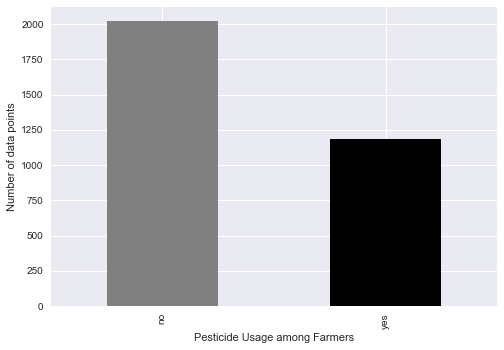

In [150]:
fig = renamed_df.PestUse.value_counts().plot(kind= 'bar', color = ('grey', 'black'))
plt.xlabel('Pesticide Usage among Farmers')
plt.ylabel('Number of data points')
plt.show()

In [151]:
fig_copy = fig.get_figure() 

fig_copy.savefig('Desktop/Figures_hortilinea/Pesticide_Use.png')

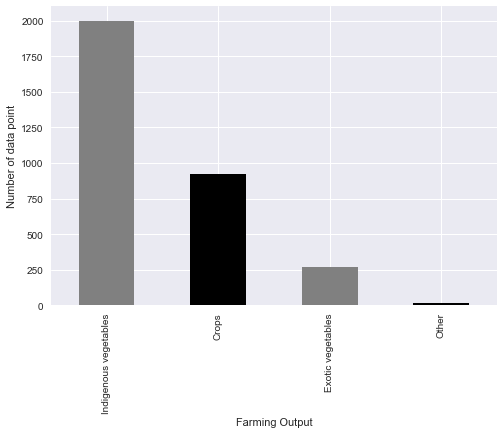

In [152]:
fig=renamed_df.ProductClass.value_counts().plot(kind= 'bar', color = ('grey', 'black'))
plt.xlabel('Farming Output')
plt.ylabel('Number of data point')
plt.show()

In [153]:
fig_copy = fig.get_figure() 

fig_copy.savefig('Desktop/Figures_hortilinea/Farming_Output.png')

In [154]:
renamed_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3208 entries, 1 to 6910
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   QuestNumber              3208 non-null   category
 1   ProductDesignation       3208 non-null   category
 2   ProductClass             3208 non-null   category
 3   TotalCropArea            3208 non-null   float64 
 4   LeadProducer             3173 non-null   category
 5   ProductCultivationStart  3208 non-null   int32   
 6   YieldInAllSeasons        3174 non-null   object  
 7   YieldinUnits             3208 non-null   float32 
 8   HarvestSoldQty           3208 non-null   float64 
 9   HarvestSoldUnits         3208 non-null   float32 
 10  PostHarvestPrice         3208 non-null   float64 
 11  SalespersoninHouse       3208 non-null   category
 12  StoredHarvestQty         3208 non-null   float64 
 13  StoredHarvestUnits       3208 non-null   float32 
 14  OwnHarve

In [155]:
renamed_df.LeadProducer = renamed_df.LeadProducer.replace({
    'Head' : 'Husband',
 'Spouse':'Wife',
 'nan':'Unknown',
 'Both head and spouse':'WifeAndHubsband' ,
 '15.0':'Unknown',
 'Son/Daughter':'Children',
 'Other Specify':'Unknown',
 'Brother/Sister':  'Sibling',
 '0.1':'Unknown' ,
 '1960.0' :'Unknown',
 '1980.0' :'Unknown',
 '2002.0' :'Unknown',
 '1990.0':'Unknown',
 '1997.0':'Unknown',
 '2000.0':'Unknown',
 '2006.0':'Unknown',
 '2014.0':'Unknown'
})

In [156]:
np.set_printoptions(suppress=True)


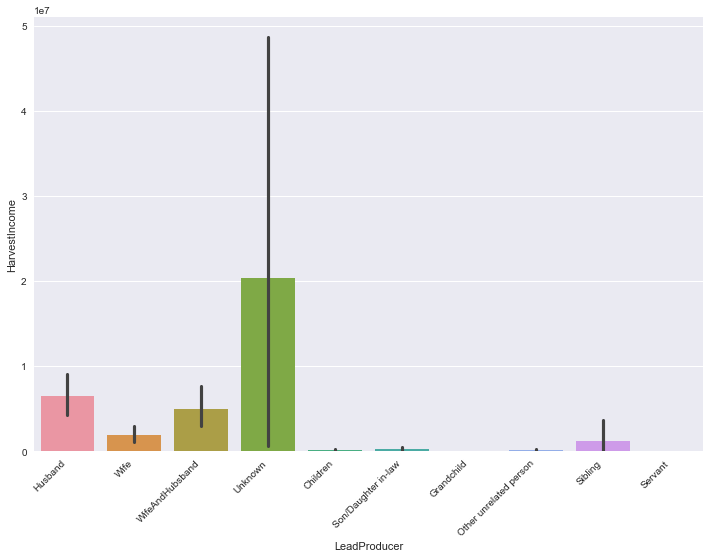

In [157]:
plt.figure(figsize =(12, 8))
g= sns.barplot(x = 'LeadProducer', y= 'HarvestIncome', data = renamed_df)
sns.set(context='poster',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=0.8,
    color_codes=True,
    rc=None)
g.set_xticklabels(g.get_xticklabels(), rotation=45,horizontalalignment='right',
    fontweight='light')

plt.show()

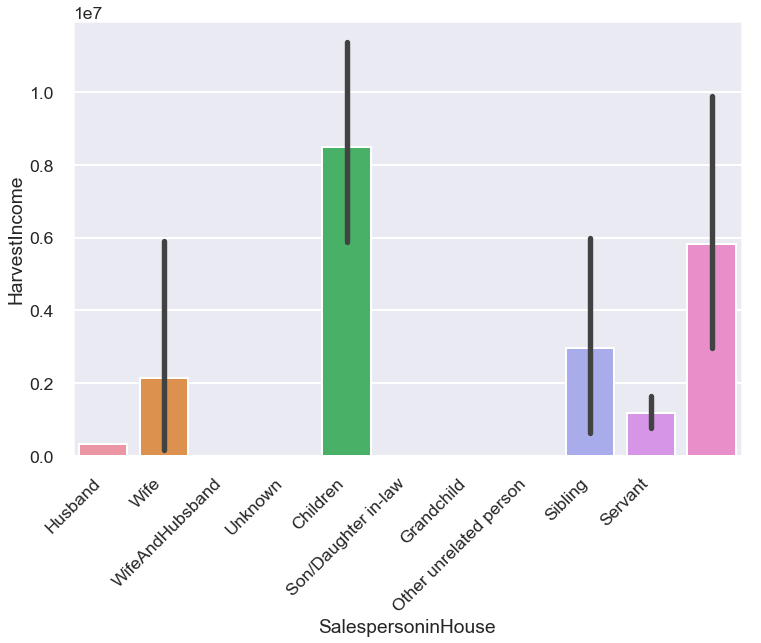

In [158]:
plt.figure(figsize =(12, 8))
f= sns.barplot(x = 'SalespersoninHouse', y= 'HarvestIncome', data = renamed_df)
sns.set(context='poster',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=0.8,
    color_codes=True,
    rc=None)
f.set_xticklabels(g.get_xticklabels(), rotation=45,horizontalalignment='right',
    fontweight='light')

plt.show()

In [159]:
renamed_df.YieldedQtyinKg = renamed_df.YieldedQtyinKg.astype('float32')

In [160]:
renamed_df.YieldedQtyinKg

1            2.5
15           3.0
16           3.0
17           7.5
19           0.6
          ...   
6904      1232.0
6907    123200.0
6908    123200.0
6909    123200.0
6910    123200.0
Name: YieldedQtyinKg, Length: 3208, dtype: float32

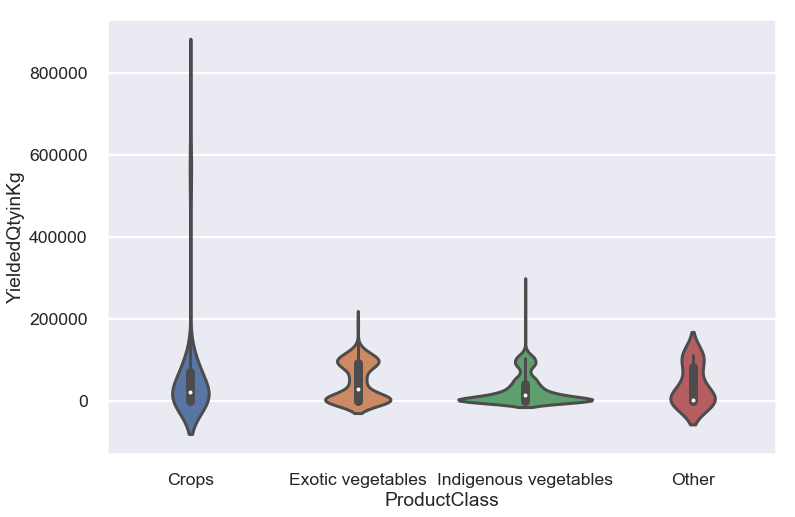

In [161]:
plt.figure(figsize =(12, 8))
fig= sns.violinplot(x='ProductClass', y='YieldedQtyinKg', hue=None, 
                  data=renamed_df, order=None, hue_order=None, bw='scott',
                  cut=2, scale='area', scale_hue=True, gridsize=100, 
                  width=0.8, inner='box', split=False, dodge=True, orient=None,
                  linewidth=None, color=None, palette=None, saturation=0.75,
                  ax=None)

In [162]:
fig_copy = fig.get_figure() 

fig_copy.savefig('Desktop/Figures_hortilinea/Harvest Income to Salesperson.png')

In [163]:
source1 = renamed_df[['ProductCultivationStart', 'HarvestIncome', 'LeadProducer', 'SalespersoninHouse','ProductClass', 'YieldedQtyinKg', 'PostHarvestPrice']]


plt.figure(figsize =(12,8))

alt.Chart(source1).mark_line(point=True).encode(
    x='ProductCultivationStart:N',
    y='HarvestIncome:Q',
    color='ProductClass:N'
)

alt.Chart(...)

<Figure size 864x576 with 0 Axes>

In [164]:
renamed_df.ProductCultivationStart

1       2008
15      1990
16      1990
17      1990
19      1990
        ... 
6904    1980
6907    2000
6908    2000
6909    2007
6910    2007
Name: ProductCultivationStart, Length: 3208, dtype: int32

In [165]:
source = renamed_df[['ProductCultivationStart','PestUse', 'ProductDesignation', 'HarvestIncome', 'ProductClass', 'YieldedQtyinKg', 'PostHarvestPrice']]



In [166]:
alt.Chart(source).mark_circle().encode(x = 'YieldedQtyinKg', y= 'PostHarvestPrice', color = 'ProductClass')

alt.Chart(...)

In [167]:
alt.Chart(source1).mark_bar().encode(
    alt.X('ProductCultivationStart:N', bin=True),
    y='count()')

alt.Chart(...)

In [168]:
bars = alt.Chart(source).mark_bar().encode(
    x="YieldedQtyinKg:Q",
    y="ProductCultivationStart:O"
)
text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=4 # Nudges text to right so it doesn't appear on top of the bar
)#.encode(
    #text='ProductClass:N'
#)

(bars + text).properties(height=700)



alt.LayerChart(...)

In [169]:
alt.Chart(source1).mark_bar().encode(
    x='ProductCultivationStart:N',
    y='sum(YieldedQtyinKg):Q',
    color='ProductClass:N',
    order=alt.Order("ProductClass", sort="ascending")
)

alt.Chart(...)

In [170]:
alt.Chart(source1).mark_area().encode(
    x='ProductCultivationStart:N',
    y='sum(YieldedQtyinKg):Q',
    color='ProductClass:N',
    order=alt.Order("ProductClass", sort="ascending")
)

alt.Chart(...)

In [171]:
alt.Chart(source).mark_bar().encode(
    column='PestUse:O',
    x='YieldedQtyinKg:Q',
    y='ProductClass:N',
    color='ProductClass:N'
).properties(width=220)

alt.Chart(...)

In [172]:
source4 = renamed_df[['PestUse', 'IrrigationUse', 'ProductClass', 'LeadProducer', 'YieldedQtyinKg']]
alt.Chart(source4).mark_bar().encode(
    column='IrrigationUse:O',
    x='YieldedQtyinKg:Q',
    y='ProductClass:N',
    color='ProductClass:N'
).properties(width=220)

alt.Chart(...)

In [173]:
alt.Chart(source).mark_area().encode(
    x='ProductClass:O',
    y=alt.Y(
        'sum(HarvestIncome):Q',
        title='Harvest Income',
        axis=alt.Axis(format='~s')
    ),
    facet=alt.Facet('ProductCultivationStart:O', columns=8),
).properties(
    title='Harvest Income by Year',
    width=90,
    height=80
)

alt.Chart(...)

In [174]:
import squarify

In [175]:
grouped_prod = renamed_df.groupby(['SalespersoninHouse'])['HarvestIncome'].agg('sum')

In [176]:
grouped_prod

SalespersoninHouse
Brother/Sister in-law     3.420000e+05
Child                     1.046686e+08
Cousin                    7.480000e+02
Grandchild                1.020000e+03
Husband                   8.840526e+09
Other unrelated person    3.200000e+01
Servant                   3.060000e+03
Sibling                   2.000000e+02
Unknown                   4.266335e+08
Wife                      1.898072e+09
WifeandHusband            2.056319e+09
Name: HarvestIncome, dtype: float64

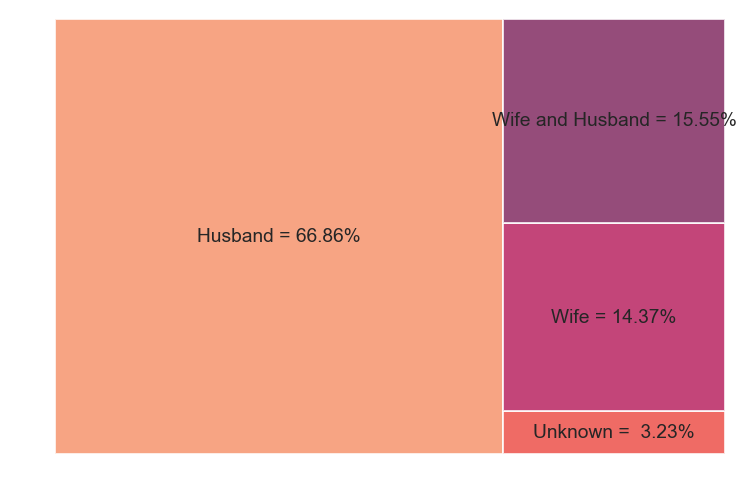

In [177]:
plt.figure(figsize =(12, 8))
data = pd.DataFrame({'Harvest Income':[8.841509e+09,  4.266509e+08,1.899794e+09, 2.056758e+09], 'group':[
"Husband", "Unknown", "Wife", "Wife and Husband"] })

perc = [str('{:5.2f}'.format(i/data['Harvest Income'].sum()*100)) + "%" for i in data['Harvest Income']]
lbl = [el[0] + " = " + el[1] for el in zip(data['group'], perc)]
fig= squarify.plot(sizes=data['Harvest Income'], label=lbl, alpha=.8 )
plt.axis('off')
plt.show()

In [178]:
fig_copy = fig.get_figure() 

fig_copy.savefig('Desktop/Figures_hortilinea/treemap.png')

In [179]:
sns.set(style="ticks", color_codes=True)
%matplotlib inline

In [180]:
corrMatrix = renamed_df_num.corr(method = 'pearson')

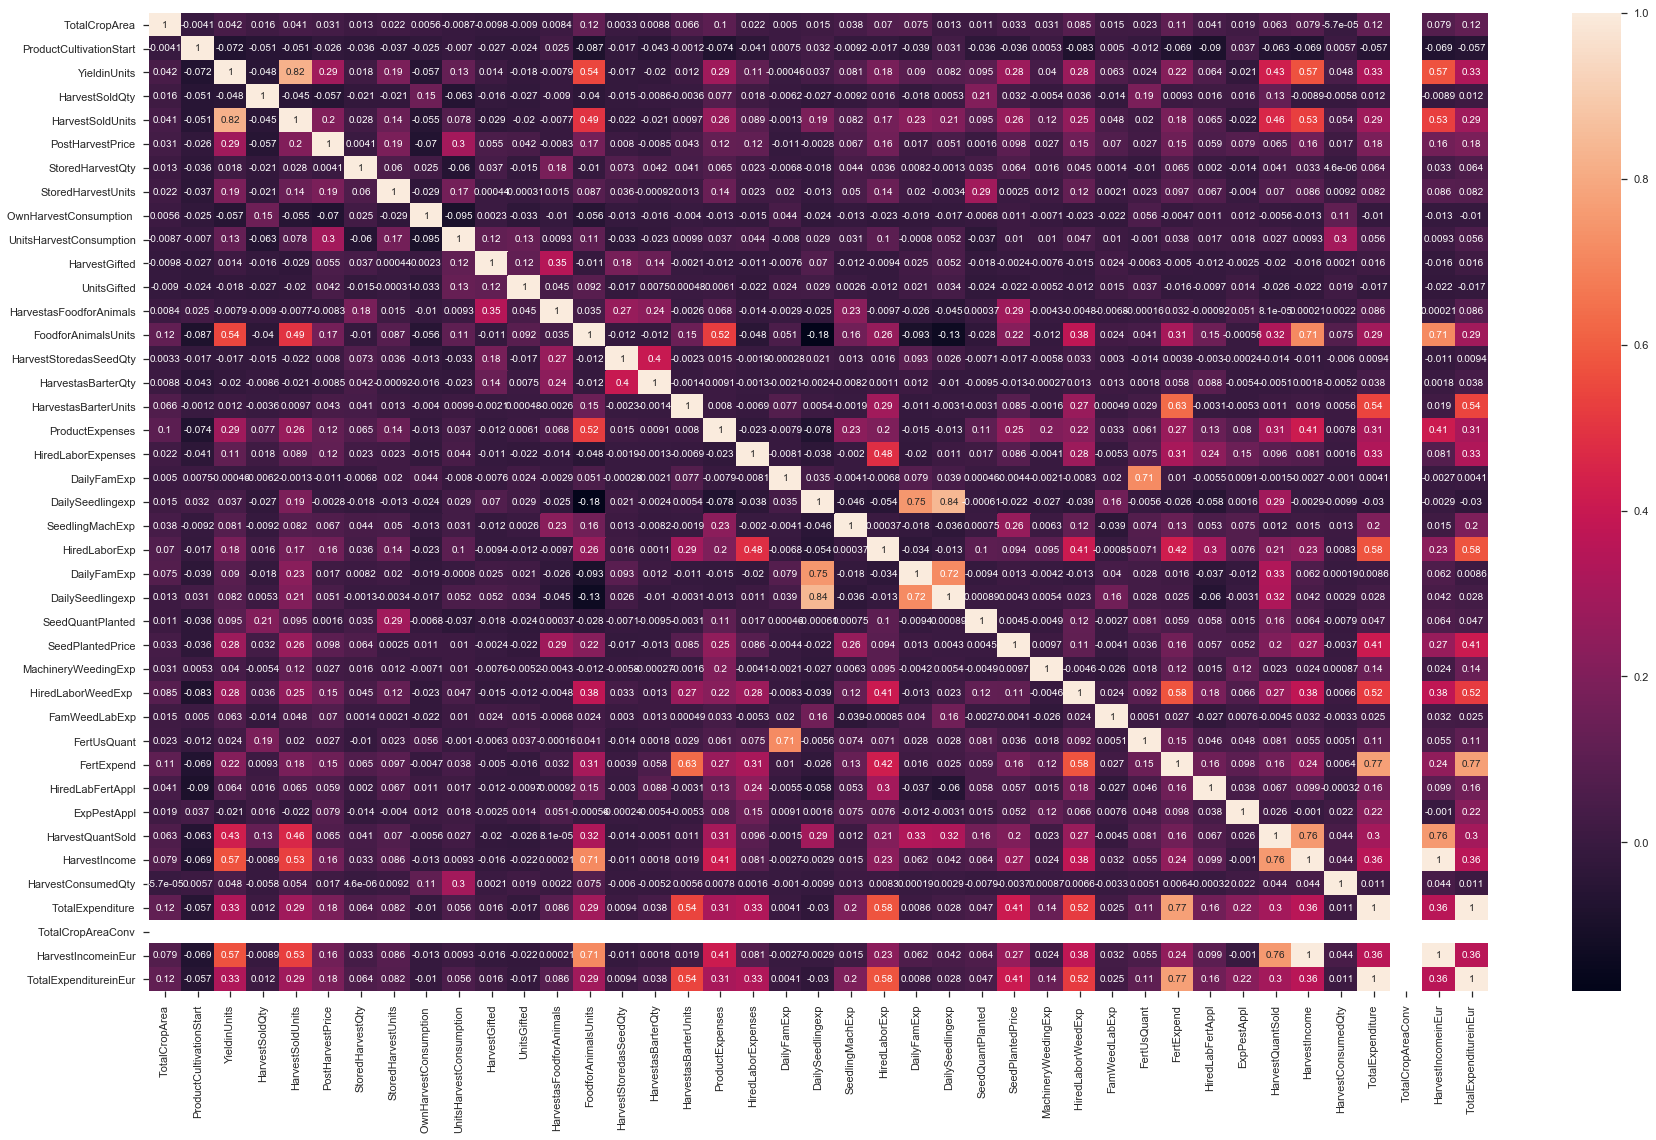

In [181]:
plt.figure(figsize=(30, 18))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [182]:
corrMatrix1 = renamed_df_num[['HarvestSoldUnits', 'YieldinUnits', 'HarvestIncomeinEur', 'TotalExpenditure',
 'TotalCropAreaConv','ProductCultivationStart', 'HarvestConsumedQty']].corr(method = 'pearson')

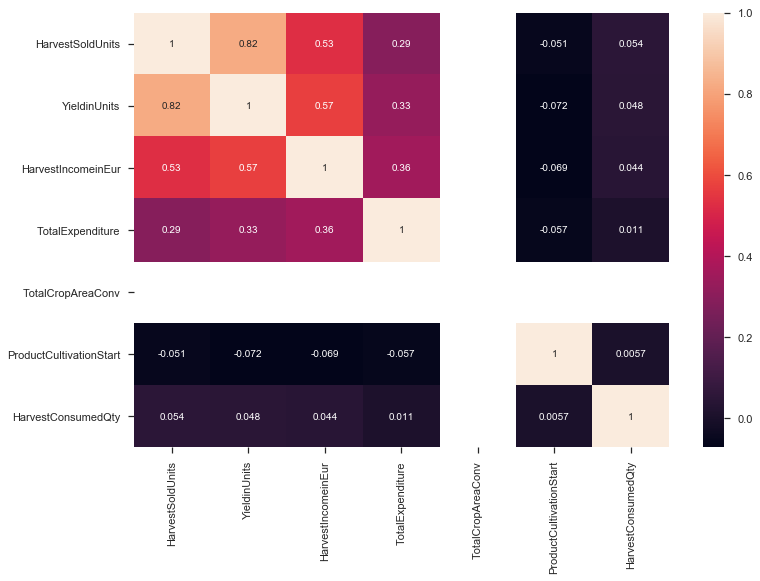

In [183]:
plt.figure(figsize=(12, 8))
sns.heatmap(corrMatrix1, annot=True)
plt.show()

## Trying Some Machine Learning

### Trying to Converge Towards a Linear Regression

### A Regression Plot with Seaborn 

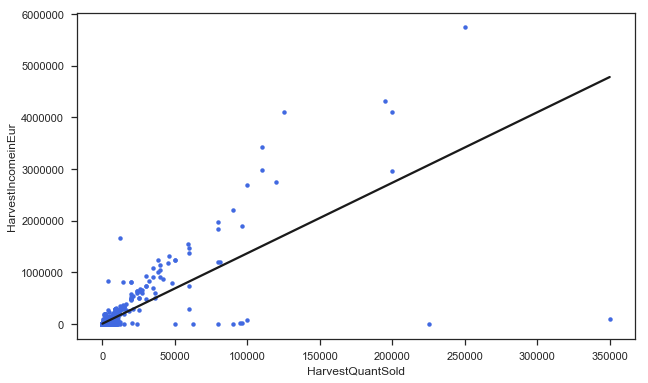

In [184]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x='HarvestQuantSold', y='HarvestIncomeinEur',
            ci=None, data=renamed_df, ax=ax, 
            color='k', scatter_kws={"s": 20,"color": "royalblue", "alpha":1})

###  A Multiple Linear Regression with the Statsmodels Package



In [185]:
linearModel = smf.ols(formula='HarvestIncomeinEur ~  HarvestQuantSold + PostHarvestPrice + TotalExpenditure + C(ProductDesignation) + SeedPlantedPrice',data=renamed_df)
linearModelResult = linearModel.fit()
print(linearModelResult.summary())

                            OLS Regression Results                            
Dep. Variable:     HarvestIncomeinEur   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     130.2
Date:                Thu, 25 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:49:45   Log-Likelihood:                -42598.
No. Observations:                3208   AIC:                         8.529e+04
Df Residuals:                    3161   BIC:                         8.558e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

#### A bit of cleaning once again...

In [186]:
renamed_df.PestUse= renamed_df.PestUse.astype('category')


In [187]:
renamed_df.PestUse

1       no
15      no
16      no
17      no
19      no
        ..
6904    no
6907    no
6908    no
6909    no
6910    no
Name: PestUse, Length: 3208, dtype: category
Categories (2, object): [no, yes]

In [188]:
list(renamed_df.LeadProducer.unique())

['Husband',
 'Wife',
 nan,
 'WifeAndHubsband',
 'Unknown',
 'Children',
 'Son/Daughter in-law',
 'Grandchild',
 'Other unrelated person',
 'Sibling',
 'Servant']

In [189]:
renamed_df.LeadProducer = renamed_df.LeadProducer.astype('category')

In [190]:
renamed_df.LeadProducer

1       Husband
15      Husband
16      Husband
17      Husband
19         Wife
         ...   
6904       Wife
6907       Wife
6908       Wife
6909       Wife
6910       Wife
Name: LeadProducer, Length: 3208, dtype: category
Categories (10, object): [Children, Grandchild, Husband, Other unrelated person, ..., Son/Daughter in-law, Unknown, Wife, WifeAndHubsband]

In [191]:
renamed_df.TotalCropArea.unique()

array([ 1.     ,  6.     ,  0.25   ,  0.05   ,  0.5    ,  0.06   ,
        0.062  ,  0.3    ,  0.1    ,  0.02   ,  0.     ,  1.5    ,
        0.75   ,  0.13   ,  0.08   ,  5.     ,  0.01   ,  0.2    ,
        0.15   ,  0.8    ,  0.4    ,  2.     , 10.     ,  3.     ,
        0.125  ,  0.03   ,  3.5    , 90.     ,  0.063  ,  0.18   ,
        0.7    ,  0.025  ,  2.5    ,  1.2    ,  0.6    ,  0.9    ,
        0.12   ,  0.0625 ,  0.625  ,  0.09   ,  0.45   ,  1.3    ,
        4.25   ,  1.25   ,  0.04   ,  0.65   ,  4.     ,  9.     ,
        0.06125,  0.16   ,  1.75   ,  0.14   ,  0.005  ,  0.127  ,
        3.06   ,  0.31   ,  2.25   ,  0.175  ,  0.0125 ,  0.33   ,
        0.065  , 15.     ,  8.     ,  0.015  ,  0.41   ,  0.132  ,
        0.001  ,  0.008  ,  0.012  ,  0.042  ])

In [192]:
renamed_df.TotalCropArea = renamed_df.TotalCropArea.astype('float')

In [193]:
renamed_df.TotalCropArea

1       1.00
15      6.00
16      6.00
17      0.25
19      0.05
        ... 
6904    0.50
6907    0.18
6908    0.16
6909    0.25
6910    0.25
Name: TotalCropArea, Length: 3208, dtype: float64

### Linear Regression in Machine Learning 

In [194]:
def my_hist(column, title, xlab, ylab, bins = 10, alpha = 0.7, color = 'c'):
    title = title
    plt.figure(figsize = (10,6))
    plt.hist(column, bins = bins, alpha = alpha, color = color)
    plt.title(title, fontsize = 15)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.savefig(title, dpi = 300)
    plt.show()

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score

In [196]:
def regression_model(model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 99)
    reg_all = model
    reg_all.fit(X_train, y_train)
    train_pred = reg_all.predict(X_train)
    train_score = r2_score( y_train, train_pred)
    reg_all.coef_
    reg_all.intercept_
    y_pred = reg_all.predict(X_test)
    test_score= r2_score(y_test, y_pred)
    print('Train Score:', round(train_score, 2))
    print('Test Score:', round(test_score, 2))
    
    
    

In [197]:
X= renamed_df[['HarvestQuantSold', 'PostHarvestPrice', 'TotalExpenditure', 'SeedPlantedPrice']]
y= renamed_df[['HarvestIncomeinEur']]

In [198]:
regression_model(LinearRegression())

Train Score: 0.77
Test Score: -0.46


In [199]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_validate

In [200]:
def regression_model_cv(model, k= 5):
    scores = cross_validate(model, X, y, scoring='r2', cv=k, return_train_score=True)
    print('Train Scores:', scores['train_score'])
    print('=============================================================')
    print('Test Scores:', scores['test_score'])
    print('=============================================================')
    print('Test Score Agrregrated:', scores['test_score'].mean())


In [201]:
regression_model_cv(LinearRegression())

Train Scores: [0.55014908 0.65735969 0.46731959 0.59838602 0.75350843]
Test Scores: [ 0.81753283  0.12179442  0.59255656  0.60907234 -4.00299248]
Test Score Agrregrated: -0.37240726575254834


In [202]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [203]:
model1 = Ridge()
model2= Lasso()

In [204]:
regression_model_cv(model1)


Train Scores: [0.55014908 0.65735969 0.46731959 0.59838602 0.75350843]
Test Scores: [ 0.81753283  0.12179442  0.59255656  0.60907234 -4.00299248]
Test Score Agrregrated: -0.37240726574464755


In [205]:
regression_model_cv(model2)

Train Scores: [0.55014908 0.65735969 0.46731959 0.59838602 0.75350843]
Test Scores: [ 0.81753283  0.12179442  0.59255656  0.60907235 -4.00299249]
Test Score Agrregrated: -0.3724072666438575


In [206]:
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor(random_state = 0)

In [207]:
regression_model_cv(model4)

/Users/wilfriedzoungrana/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/wilfriedzoungrana/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/wilfriedzoungrana/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/wilfriedzoungrana/opt/miniconda3/lib/python3.7/s

Train Scores: [0.97466505 0.97805219 0.98062449 0.97203294 0.96932387]
Test Scores: [ 0.94606088  0.69259201  0.8728149   0.94222273 -0.00851451]
Test Score Agrregrated: 0.6890352026123197


In [208]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [209]:
steps =[('scaler', MinMaxScaler()),('poly', PolynomialFeatures(degree = 2)),
        ('lr', LinearRegression())]

In [210]:
model6 = Pipeline(steps)

In [211]:
regression_model_cv(model6)

Train Scores: [1. 1. 1. 1. 1.]
Test Scores: [1. 1. 1. 1. 1.]
Test Score Agrregrated: 1.0


## Let's try a Clustering Here

In [212]:
from sklearn.cluster import KMeans

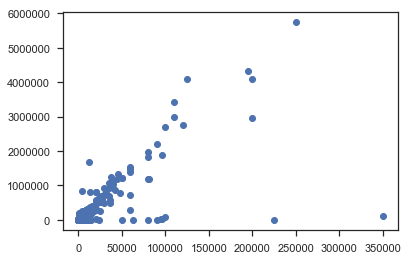

In [213]:
plt.scatter(renamed_df['HarvestQuantSold'], renamed_df['HarvestIncomeinEur'] )

In [214]:
X_cluster = renamed_df[[                
'HarvestQuantSold','HarvestIncomeinEur']]

In [215]:
X_cluster

HarvestQuantSold  HarvestIncomeinEur
1                 0.24               0.295
15              540.00           26568.000
16              900.00             590.400
17               20.00              21.320
19                0.16               0.013
...                ...                 ...
6904             10.00              32.800
6907            100.00             656.000
6908            100.00             656.000
6909            100.00             820.000
6910            100.00             820.000

[3208 rows x 2 columns]

In [216]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

In [217]:
X_cluster_transformed = scaler.fit_transform (X_cluster)

In [218]:
X_cluster_transformed

array([[-0.15434072, -0.1415207 ],
       [-0.1138358 , -0.03114334],
       [-0.08682052, -0.13906907],
       ...,
       [-0.14685449, -0.13879653],
       [-0.14685449, -0.13811518],
       [-0.14685449, -0.13811518]])

In [219]:
from sklearn.cluster import KMeans

In [220]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [221]:
kmeans.fit(X_cluster_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [222]:
labels = kmeans.labels_
#list(labels)

In [223]:
centers = kmeans.cluster_centers_
centers

array([[-0.10738895, -0.10686838],
       [13.38739354, 12.3812908 ],
       [ 3.10672806,  3.26139392]])

In [224]:
centers_inversed = scaler.inverse_transform(centers)
centers_inversed

array([[    625.9094555 ,    8341.07014923],
       [ 180454.54545455, 3014226.81818182],
       [  43456.55737705,  819077.98393443]])

In [225]:
renamed_df['Cluster'] = labels
renamed_df.sample(2)

QuestNumber ProductDesignation           ProductClass  TotalCropArea  \
788         110        Spiderplant  Indigenous vegetables            0.0   
739         105              Beans                  Crops            0.5   

        LeadProducer  ProductCultivationStart YieldInAllSeasons  YieldinUnits  \
788             Wife                     2014               110          50.0   
739  WifeAndHubsband                     2014               105         100.0   

     HarvestSoldQty  HarvestSoldUnits  ...  PestUse YieldedQtyinKg  \
788             2.0              50.0  ...      yes         5500.0   
739           105.0             100.0  ...      yes        10500.0   

     HarvestQuantSold  HarvestIncome  HarvestConsumedQty  TotalExpenditure  \
788             100.0       100000.0                50.0             900.0   
739           10500.0     31500000.0                 0.0            3300.0   

     TotalCropAreaConv  HarvestIncomeinEur  TotalExpenditureinEur  Cluster  
788                NaN               820.0                   7.38        0  
739                NaN            258300.0                  27.06        0  

[2 rows x 56 columns]

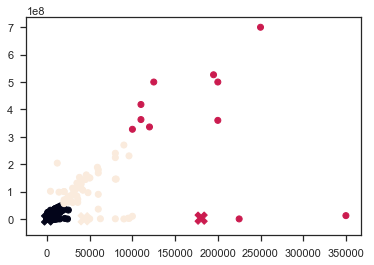

In [226]:

plt.scatter(renamed_df['HarvestQuantSold'], renamed_df['HarvestIncome'], c= labels )
plt.scatter(centers_inversed[:,0], centers_inversed[:,1], c = [0, 1, 2], marker = "X", s= 150)

In [227]:
source2 = renamed_df[['ProductDesignation', 'ProductClass','HarvestQuantSold','HarvestIncome', 'Cluster']]

alt.Chart(source2).mark_circle(size=70).encode(
    x='HarvestQuantSold',
    y='HarvestIncome',
    color= 'Cluster',
    tooltip=['ProductDesignation', 'ProductClass', 'HarvestQuantSold', 'HarvestIncome']
).interactive()

alt.Chart(...)

### Logistic Regression 

In [228]:
target_cat = renamed_df_cat.drop('PestUse', axis = 1)

In [229]:
target_cat.head()

QuestNumber   ProductDesignation           ProductClass LeadProducer  \
1            1                Pears                  Crops         Head   
15           3                Beans                  Crops         Head   
16           3                Maize                  Crops         Head   
17           3                Pears                  Crops         Head   
19           3  African night shade  Indigenous vegetables       Spouse   

   YieldInAllSeasons SalespersoninHouse HousMembPart FertUsage  \
1                  1            Husband         Head       Yes   
15                 3            Husband          NaN       Yes   
16                 3            Husband          NaN       Yes   
17                 3            Husband       Spouse       Yes   
19                 3               Wife       Spouse       Yes   

             FertUsFreq  FertKindUsed    FertOrigin IrrigationUse  \
1       Twice per season    Inorganic  Outside farm            No   
15  Once in Every season    Inorganic           NaN           Yes   
16  Once in Every season    Inorganic           NaN           Yes   
17  Once in Every season    Inorganic           NaN           Yes   
19  Once in Every season      Organic           NaN           Yes   

   YieldedQtyinKg  
1             2.5  
15              3  
16              3  
17            7.5  
19            0.6

In [230]:
dfCat = pd.get_dummies(target_cat)

In [231]:
feat_cat= renamed_df_cat.pop('PestUse')

In [232]:
feat_cat = feat_cat.apply(lambda row : 0 if row == 'no' else 1)

In [233]:
feat_cat.head()

1     0
15    0
16    0
17    0
19    0
Name: PestUse, dtype: int64

In [234]:
renamed_df['feat_cat'] = feat_cat

In [235]:
log = renamed_df[["YieldedQtyinKg", "HarvestIncome", "feat_cat"]].dropna(how = 'any')



In [236]:
X_log = log[['YieldedQtyinKg', 'HarvestIncome']].values

y_log = log['feat_cat'].values

In [237]:
X_trained, X_tested, y_trained, y_tested = train_test_split(X_log, y_log, random_state = 0, test_size = 0.25)
    



In [238]:
from sklearn.preprocessing import StandardScaler


In [239]:
stdScaler = StandardScaler()
stdScaler.fit(X_trained)
stdScaler.fit(X_tested)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [240]:
X_trained

array([[1.09500000e+05, 5.85000000e+05],
       [4.05279999e+02, 1.02000001e+04],
       [4.67000000e+04, 9.00000000e+04],
       ...,
       [1.46500000e+03, 1.20000000e+04],
       [8.93700000e+04, 1.44000000e+06],
       [9.47700000e+04, 1.45800000e+08]])

In [241]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model.fit(X_trained, y_trained)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [242]:
y_pred = log_model.predict(X_tested)

#y_pred

In [243]:
print("Accuraracy Train Score:", round(log_model.score(X_trained, y_trained),2))
print("==========================================================")

print("Accuracy Test Score:", round(log_model.score(X_tested, y_tested), 2))



Accuraracy Train Score: 0.62
Accuracy Test Score: 0.64


In [244]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_tested,y_pred)
print(conf_matrix)

[[509   0]
 [285   0]]


In [245]:
from sklearn.metrics import classification_report
class_rep = classification_report(y_tested,y_pred)
print(class_rep)


              precision    recall  f1-score   support

           0       0.64      1.00      0.78       509
           1       0.00      0.00      0.00       285

    accuracy                           0.64       794
   macro avg       0.32      0.50      0.39       794
weighted avg       0.41      0.64      0.50       794



/Users/wilfriedzoungrana/opt/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [246]:
from sklearn.metrics import roc_auc_score
y_proba = log_model.predict_proba(X_tested)
from sklearn import metrics
_false_positive, _true_positive, _thresholds= metrics.roc_curve(y_tested, y_proba[:,0])

In [247]:
y_proba

array([[0.54777922, 0.45222078],
       [0.50848611, 0.49151389],
       [0.56422237, 0.43577763],
       ...,
       [0.50016082, 0.49983918],
       [0.55528344, 0.44471656],
       [0.50205707, 0.49794293]])

In [248]:
print(_false_positive)

[0.         0.00196464 0.04518664 0.04518664 0.04715128 0.04715128
 0.04715128 0.05500982 0.05500982 0.05500982 0.05500982 0.0589391
 0.0589391  0.06090373 0.06090373 0.06876228 0.06876228 0.07465619
 0.07465619 0.08251473 0.08644401 0.09233792 0.09233792 0.09430255
 0.09430255 0.09626719 0.09626719 0.10019646 0.10019646 0.1021611
 0.1021611  0.10609037 0.10609037 0.11001965 0.11001965 0.11198428
 0.11198428 0.11394892 0.11394892 0.12180747 0.12180747 0.1237721
 0.1237721  0.1237721  0.1237721  0.12573674 0.12573674 0.12770138
 0.12770138 0.13163065 0.13163065 0.13359528 0.13359528 0.13752456
 0.13752456 0.14341847 0.14341847 0.1453831  0.1453831  0.14734774
 0.14734774 0.14734774 0.14931238 0.14931238 0.15127701 0.15127701
 0.16306483 0.16306483 0.16699411 0.17288802 0.17485265 0.17485265
 0.17681729 0.17681729 0.18467583 0.18467583 0.19056974 0.19056974
 0.19646365 0.20039293 0.20235756 0.20235756 0.21021611 0.21021611
 0.21414538 0.21414538 0.21611002 0.22003929 0.22003929 0.2239685

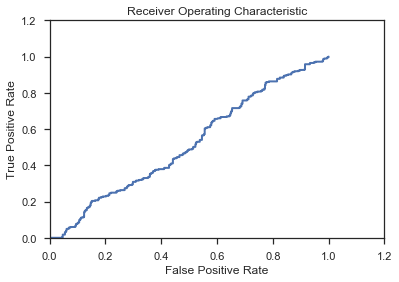

In [249]:
plt.plot (_false_positive, _true_positive, lw= 2, label = "Reveiver Operating Characteristic")

plt.xlim(0.0, 1.2)
plt.ylim(0.0, 1.2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

In [250]:
_auc = metrics.roc_auc_score(y_tested, y_proba[:,0])

In [251]:
print(_auc)

0.5170096163788647


 CART

In [257]:
from sklearn.tree import DecisionTreeClassifier 

In [258]:
model5 = DecisionTreeClassifier( criterion = 'entropy', max_depth= 10, max_features=None, max_leaf_nodes=20)

X_log_1 = log[['YieldedQtyinKg', 'HarvestIncome']].values

y_log_1 = log['feat_cat'].values

In [259]:
X_trained1, X_tested1, y_trained1, y_tested1 = train_test_split(X_log_1, y_log_1, random_state = 0, test_size = 0.3)
    




In [260]:
model5 = model5.fit(X_log_1, y_log_1)

In [261]:
model5.score(X_trained1, y_trained1)

0.6663665015758667

In [262]:
model5.score(X_tested1, y_tested1)

0.683105981112277

In [263]:
y_pred1 = model5.predict(X_tested1)


    
for i, (a, b) in enumerate(zip(y_tested1, y_pred1)):
    print (i, a, b)

0 0 0
1 1 0
2 0 0
3 0 0
4 0 0
5 0 0
6 1 0
7 0 0
8 0 0
9 0 0
10 0 0
11 0 0
12 0 0
13 0 0
14 0 1
15 1 1
16 0 0
17 0 0
18 1 1
19 0 0
20 1 0
21 1 1
22 0 0
23 0 0
24 0 0
25 0 0
26 0 0
27 0 0
28 1 0
29 1 1
30 0 0
31 1 0
32 1 1
33 0 0
34 1 0
35 1 0
36 1 1
37 0 0
38 0 0
39 0 0
40 1 0
41 0 0
42 0 0
43 0 0
44 1 0
45 0 0
46 0 1
47 1 0
48 1 0
49 1 0
50 1 1
51 1 0
52 1 0
53 1 0
54 1 0
55 1 0
56 0 0
57 0 0
58 0 0
59 0 0
60 0 0
61 1 0
62 0 1
63 0 1
64 0 0
65 1 0
66 0 0
67 0 0
68 1 0
69 0 0
70 0 0
71 1 0
72 0 0
73 0 0
74 0 0
75 0 1
76 0 0
77 1 1
78 1 0
79 1 0
80 1 0
81 1 0
82 0 0
83 1 1
84 0 0
85 1 0
86 0 0
87 1 0
88 0 0
89 0 0
90 1 0
91 0 0
92 0 0
93 1 0
94 0 0
95 0 0
96 0 0
97 1 0
98 0 0
99 0 0
100 1 0
101 0 1
102 0 0
103 0 0
104 1 1
105 1 1
106 1 0
107 1 1
108 1 1
109 1 1
110 0 0
111 0 0
112 1 0
113 0 1
114 0 0
115 0 1
116 0 0
117 0 0
118 0 0
119 0 1
120 1 0
121 1 0
122 1 0
123 0 0
124 0 0
125 0 1
126 0 0
127 0 0
128 0 0
129 1 0
130 1 0
131 0 0
132 1 0
133 0 0
134 0 0
135 0 0
136 0 0
137 1 1
138 0 

In [264]:
conf_matrix = confusion_matrix(y_tested1,y_pred1)
print(conf_matrix)

[[553  46]
 [256  98]]


In [265]:
import graphviz

In [266]:
from sklearn.tree import export_graphviz

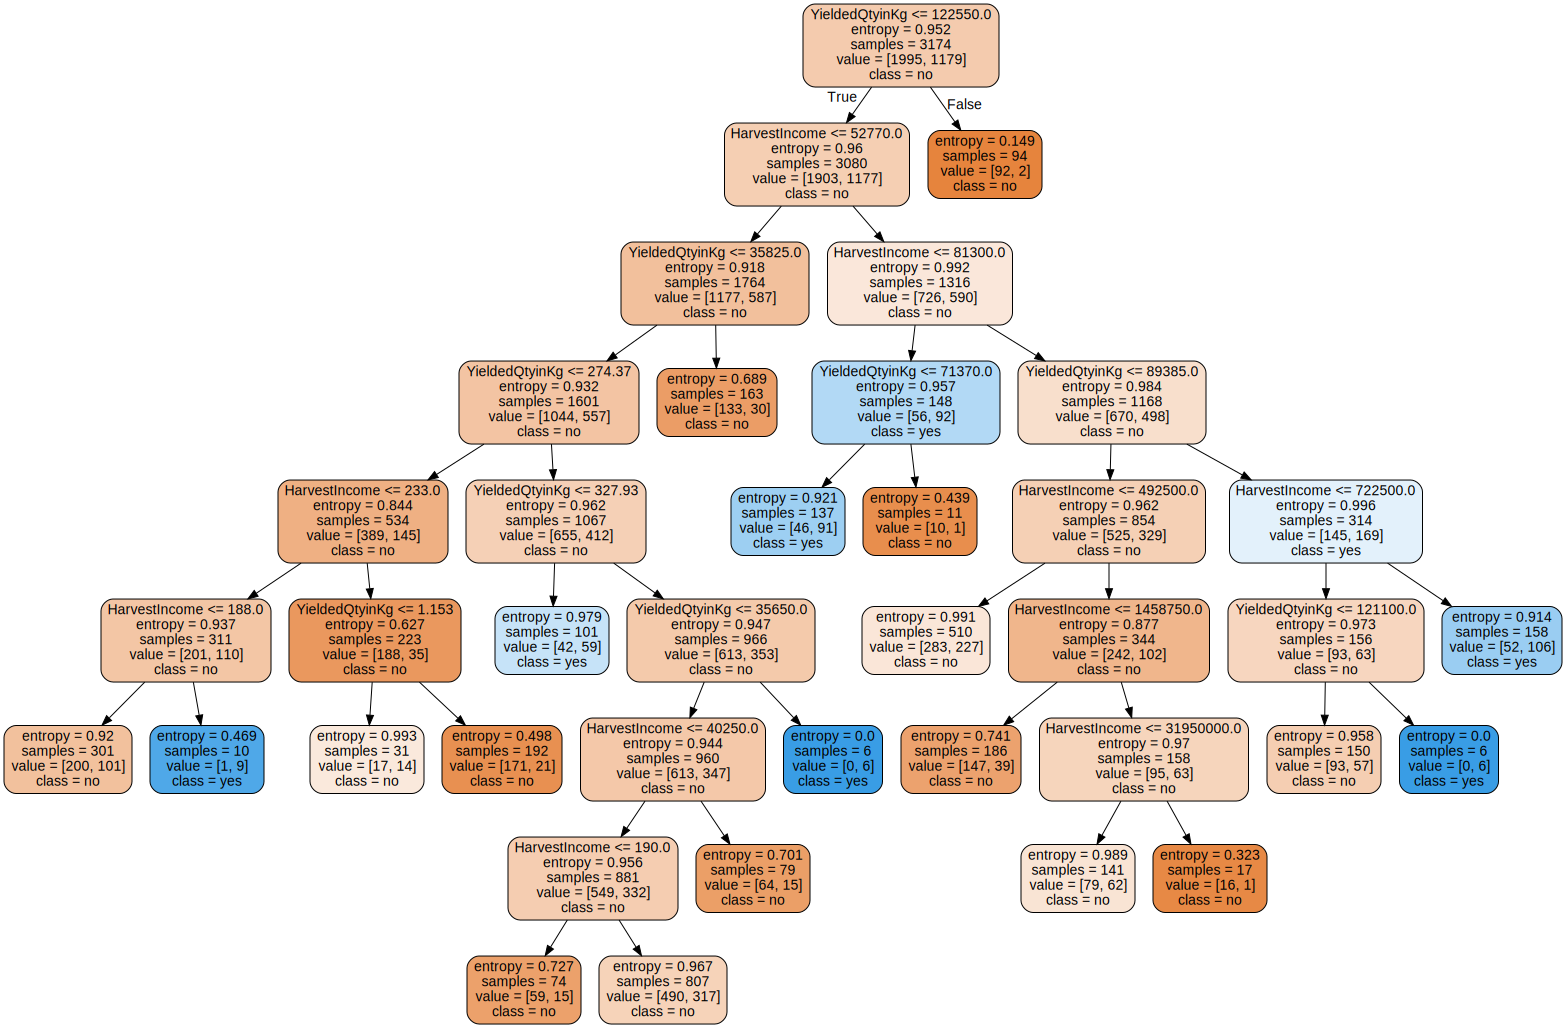

In [267]:
dot_data = export_graphviz(model5, None, feature_names = ['YieldedQtyinKg', 'HarvestIncome'],
                          class_names = ['no', 'yes'], rounded = True, filled = True )

graph = graphviz.Source(dot_data)
graph
#graph1 = graphviz.Source(dot_data, format= 'png')
#graph1.render("Desktop/Figures_hortilinea/tree.png")

In [268]:
from sklearn.externals import joblib 

/Users/wilfriedzoungrana/opt/miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [269]:
joblib.dump(model5, './model5.joblib')

['./model5.joblib']

In [270]:
m2 = joblib.load('./model5.joblib')

In [271]:
m2_preds = m2.predict(X_tested)

In [272]:
m2_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,

In [273]:
#ys = pd.DataFrame(dict(predicted= y_pred.reshape(-1),
                      #m2= m2_preds.reshape(-1)))

In [ ]:
#ys.head()